# Introducción del Proyecto
Este proyecto analiza datos históricos de ventas de videojuegos para identificar patrones que permitan predecir el éxito de un título y planificar campañas publicitarias más efectivas.

La información disponible incluye:
- Ventas por región (Norteamérica, Europa, Japón y otros países).
- Plataforma y género del juego.
- Año de lanzamiento.
- Reseñas de usuarios y críticos.
- Clasificación ESRB.

El objetivo principal es:
- Detectar plataformas y géneros con mayor potencial de ventas.
- Analizar el impacto de las reseñas y la clasificación ESRB en las ventas.
- Identificar tendencias de mercado y ciclos de vida de las consolas.
- Comparar patrones de consumo entre distintas regiones.

El análisis incluye:
- Preparación y limpieza de datos para garantizar la consistencia y el formato correcto.
- Exploración de tendencias históricas y selección del período más relevante para pronosticar ventas.
- Segmentación por región para crear perfiles de usuario.
- Pruebas de hipótesis para validar diferencias entre plataformas y géneros.
- Visualización de resultados mediante gráficos de distribución, correlaciones y diagramas de caja.

Este estudio se realiza con datos hasta 2016, simulando la planificación de campañas de marketing para el año 2017.

In [1]:
from scipy import stats as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
df= pd.read_csv("/datasets/games.csv")

In [2]:
print(df.head())

                       Name Platform  Year_of_Release         Genre  NA_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN  


In [3]:
df.columns = df.columns.str.lower()
print(df.head())

                       name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score user_score rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN  


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None


In [5]:
print(df.isna().sum())

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64


In [9]:
df = df.dropna(subset=['year_of_release'])

In [10]:
df[df.isnull().any(axis=1)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [11]:
df["year_of_release"] = df["year_of_release"].astype(int)

In [12]:
print(df["year_of_release"].min())
print(df["year_of_release"].max())

1980
2016


In [13]:
df["ventas_totales"]= df["na_sales"] + df["eu_sales"] + df["jp_sales"] + df["other_sales"]

Se cambiaron a minusculas los titulos de las columnas y se eliminaron las filas con datos ausentes en la columna "year_of_release", dado que lo usaromos como dato de clasificación, si no conocemos la fecha no nos sirve de mucho. Ademas de eso, cambiamos el tipo de dato de "year_of_release" de flotante a entero

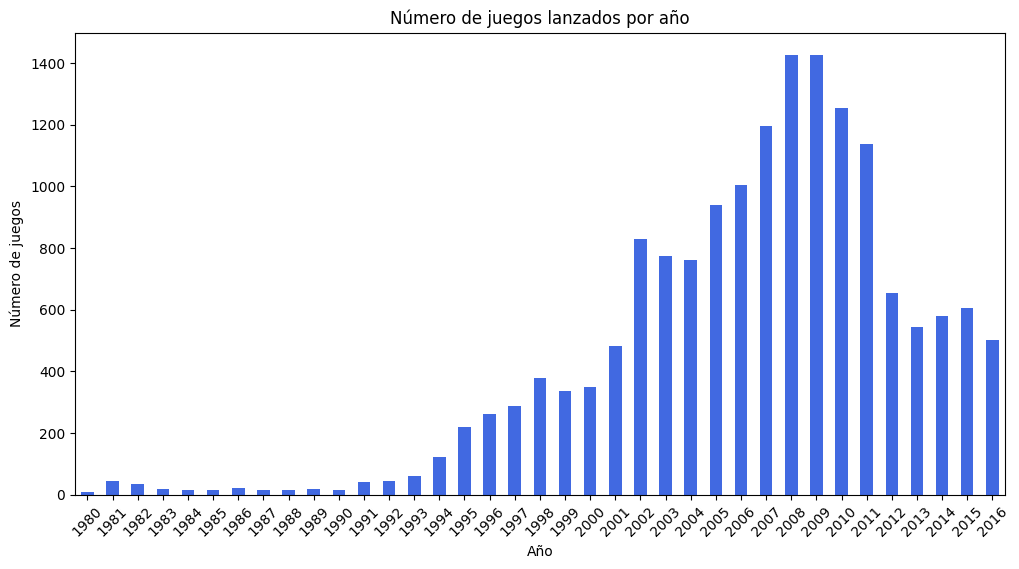

In [50]:
numero_de_juegos_por_año = df.groupby('year_of_release')["name"].count()
numero_de_juegos_por_año.plot(
    kind='bar',
    figsize=(12, 6),
    color='royalblue',
    xlabel='Año',
    ylabel='Número de juegos',
    title='Número de juegos lanzados por año',
    rot=45  # para que se vean bien los años
)
plt.show()

In [15]:
print(df["platform"].unique())

['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']


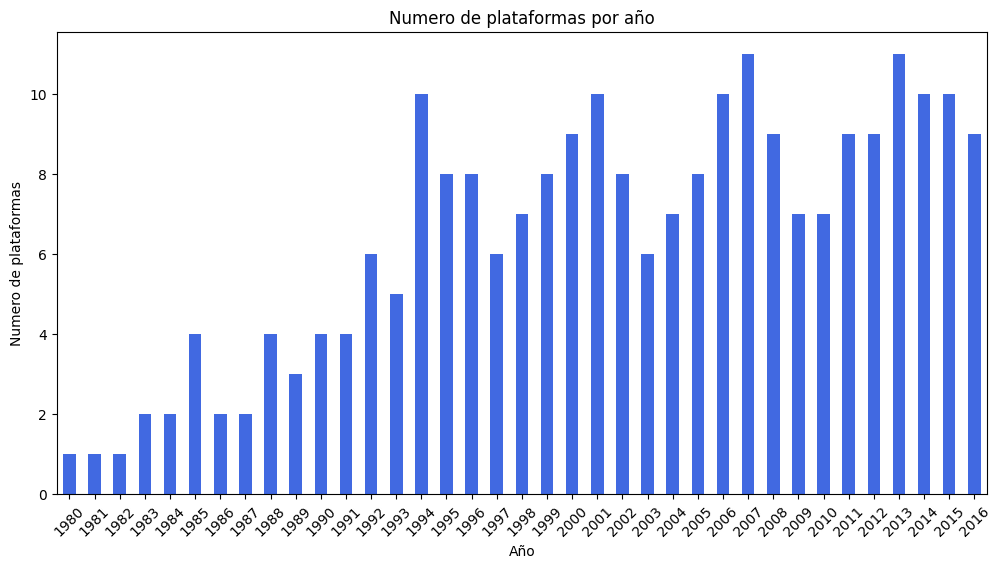

In [53]:
numero_de_plataformas_por_año = df.groupby('year_of_release')["platform"].nunique()
numero_de_plataformas_por_año.plot(
    kind='bar',
    figsize=(12, 6),
    color='royalblue',
    xlabel='Año',
    ylabel='Numero de plataformas',
    title='Numero de plataformas por año',
    rot=45  # para que se vean bien los años
)
plt.show()

In [16]:
datos_2014_2016 = df[df["year_of_release"] >= 2014]

In [17]:
print(datos_2014_2016["platform"].unique())

['PS4' '3DS' 'XOne' 'WiiU' 'PS3' 'X360' 'PC' 'Wii' 'PSV' 'PSP']


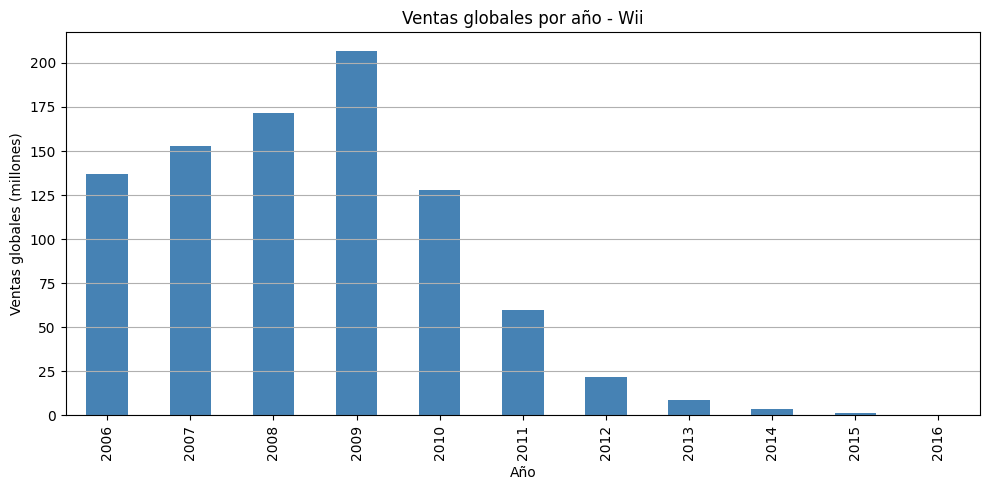

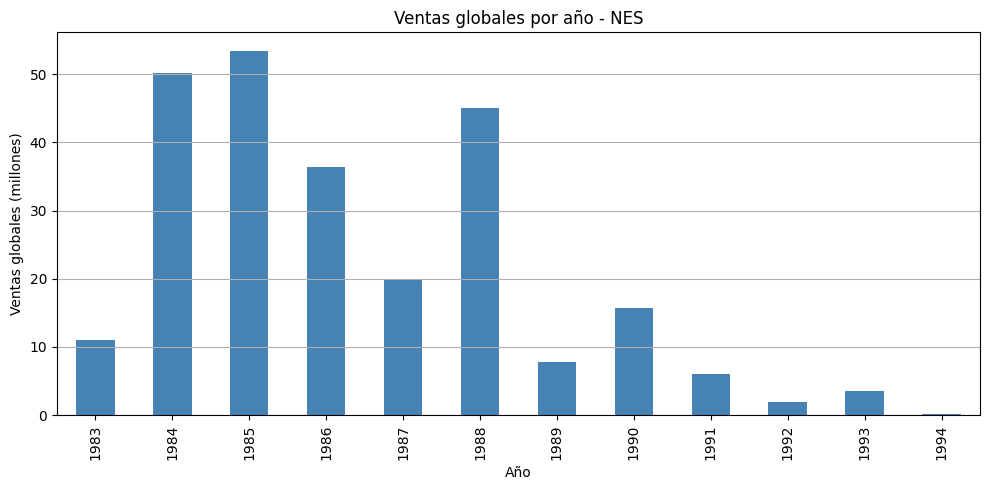

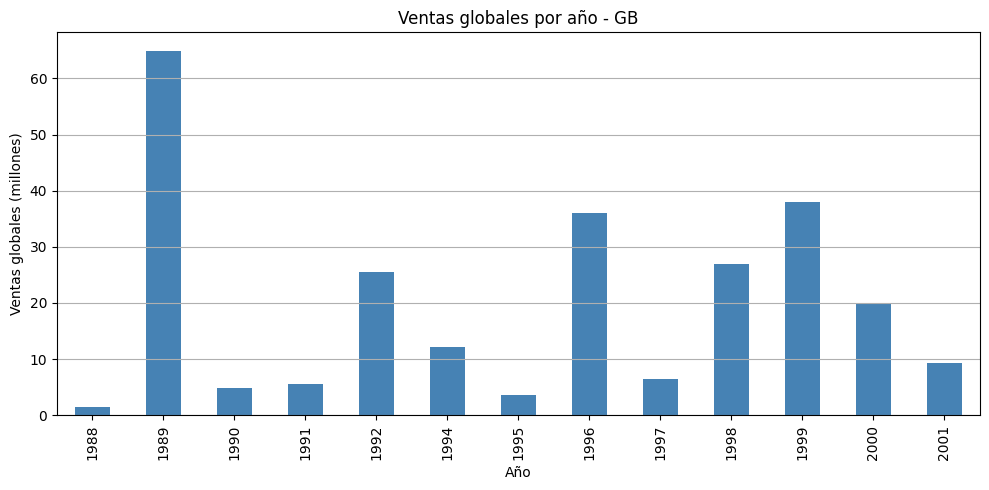

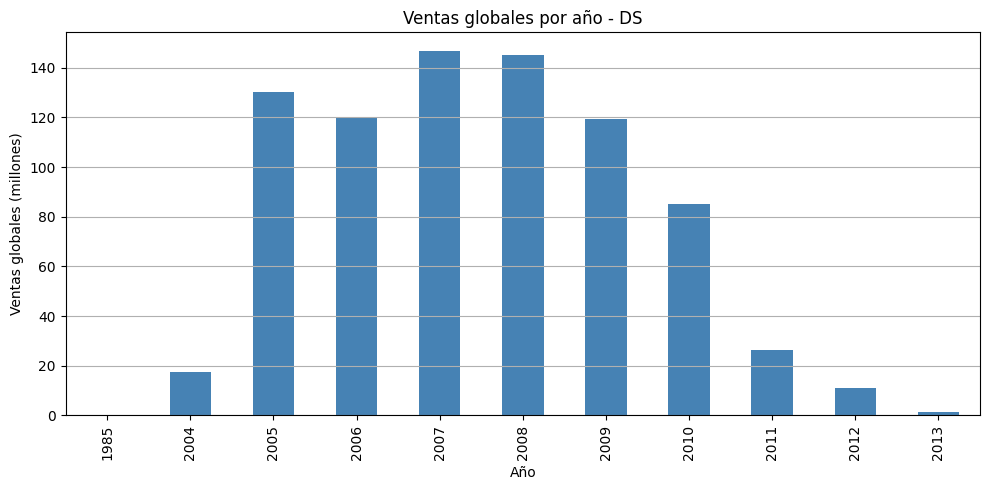

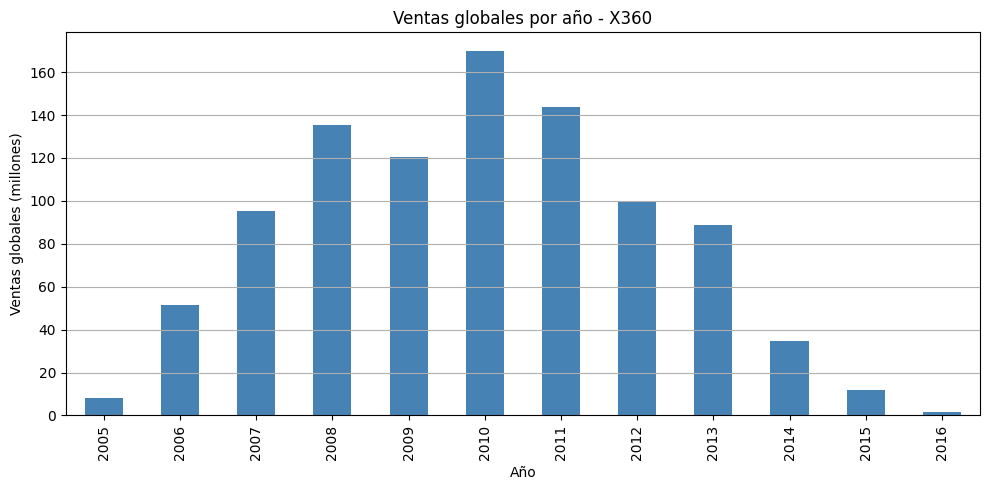

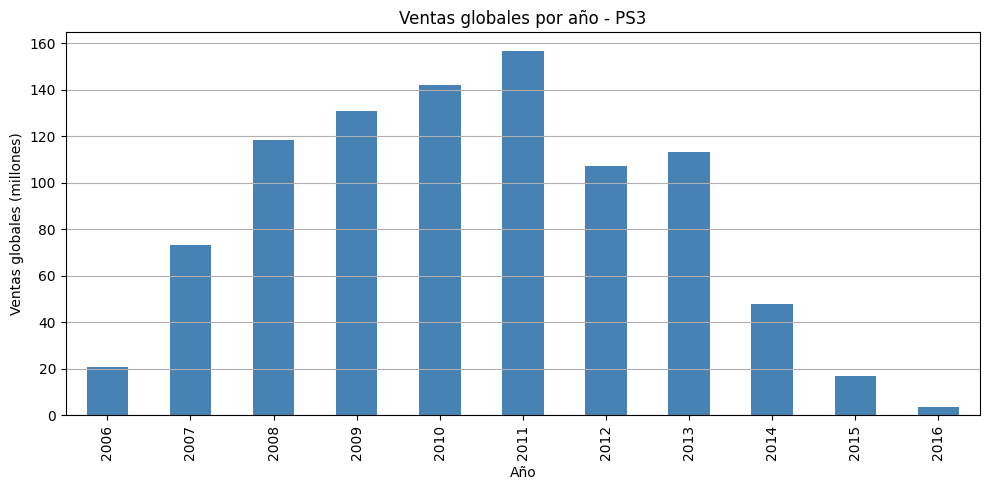

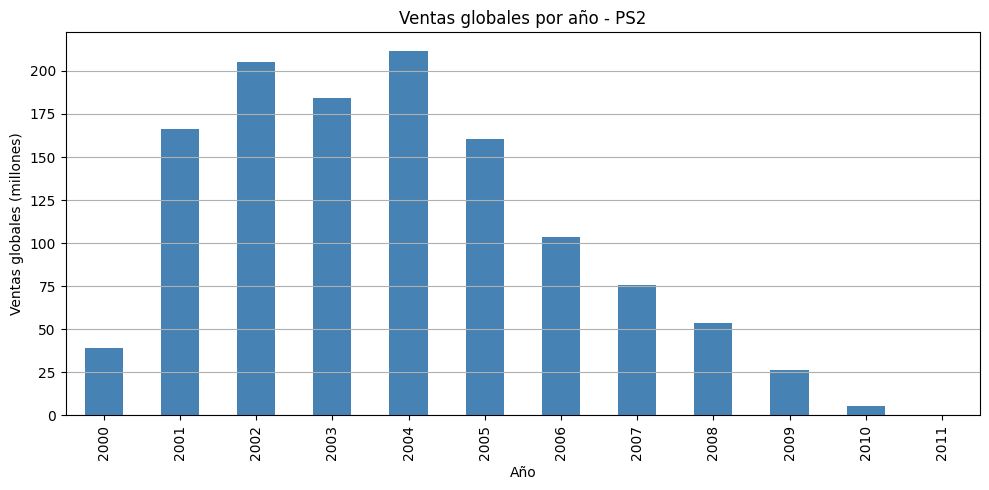

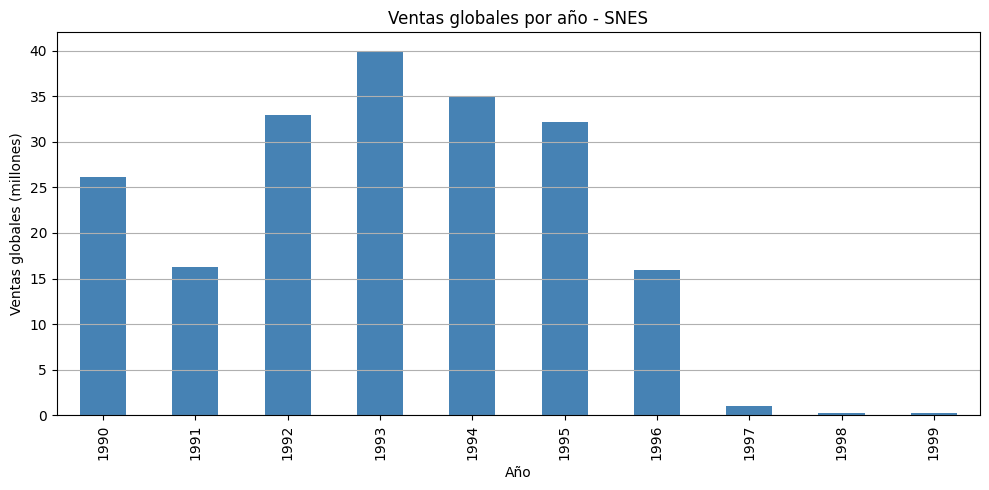

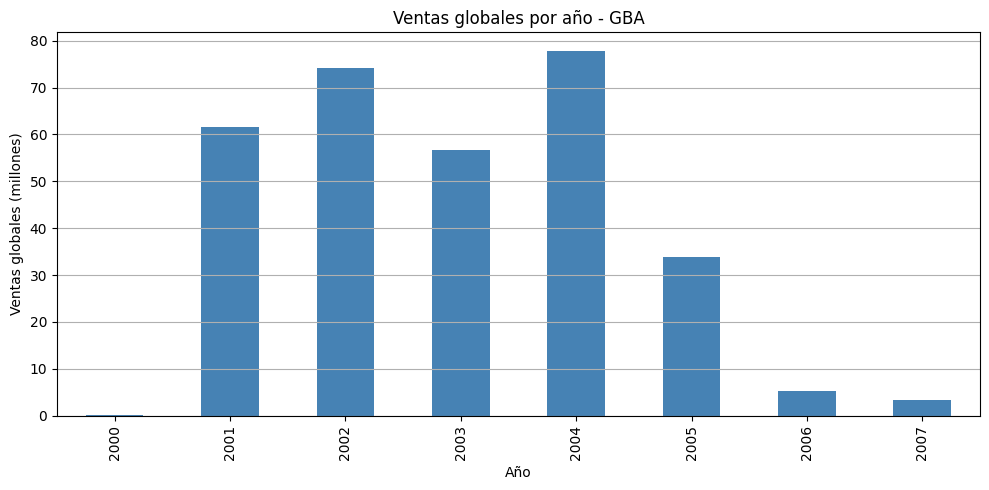

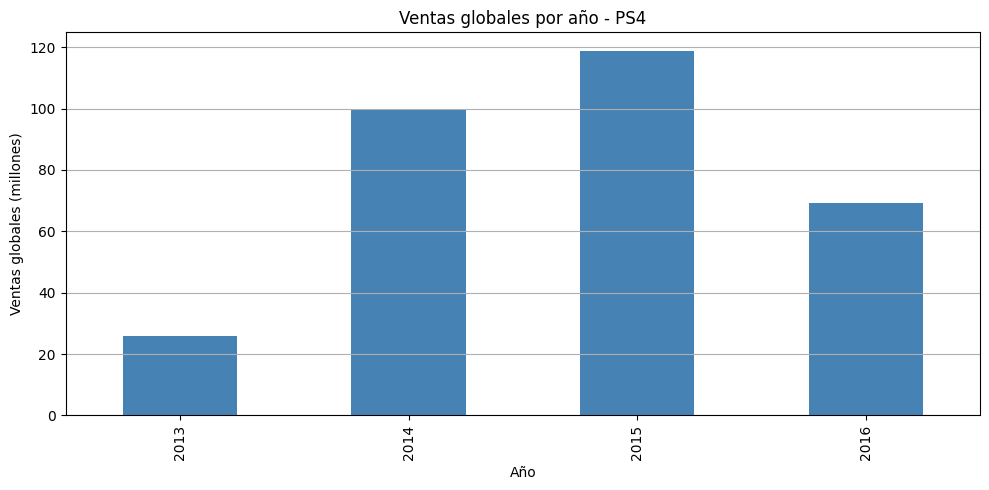

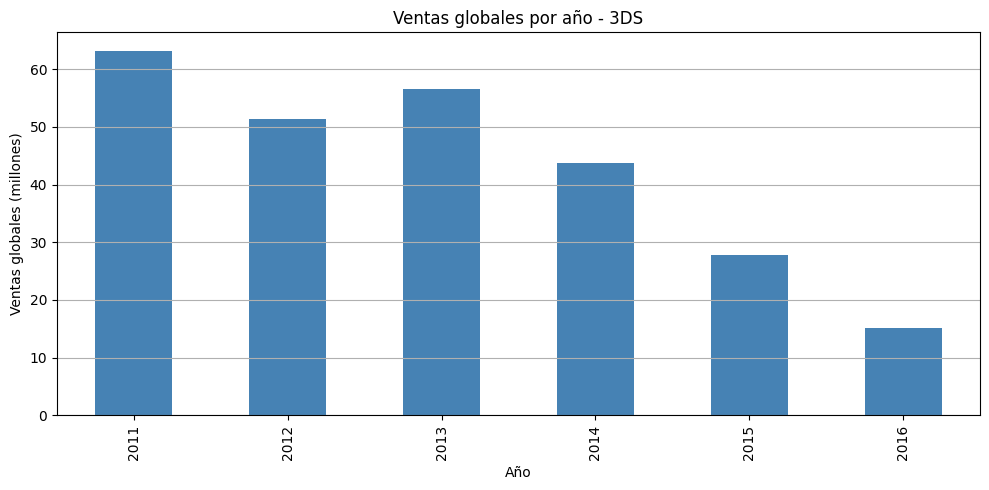

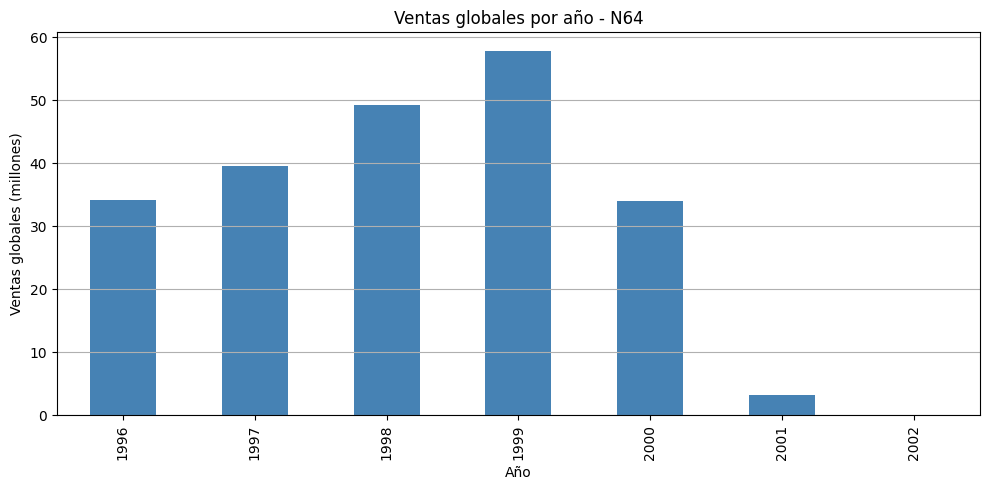

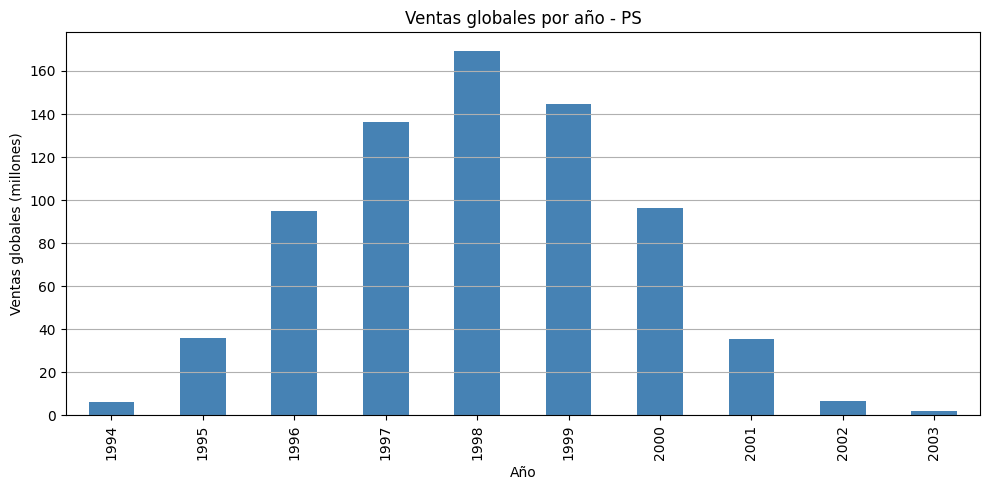

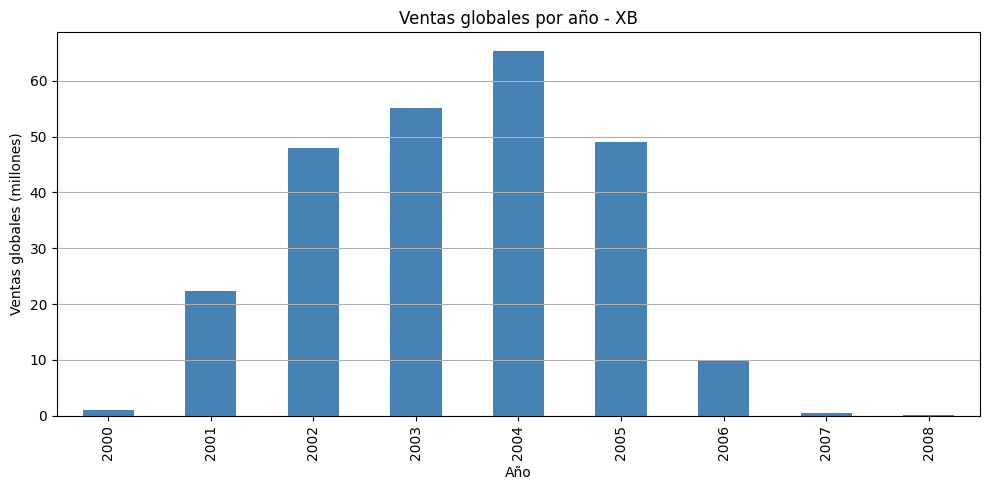

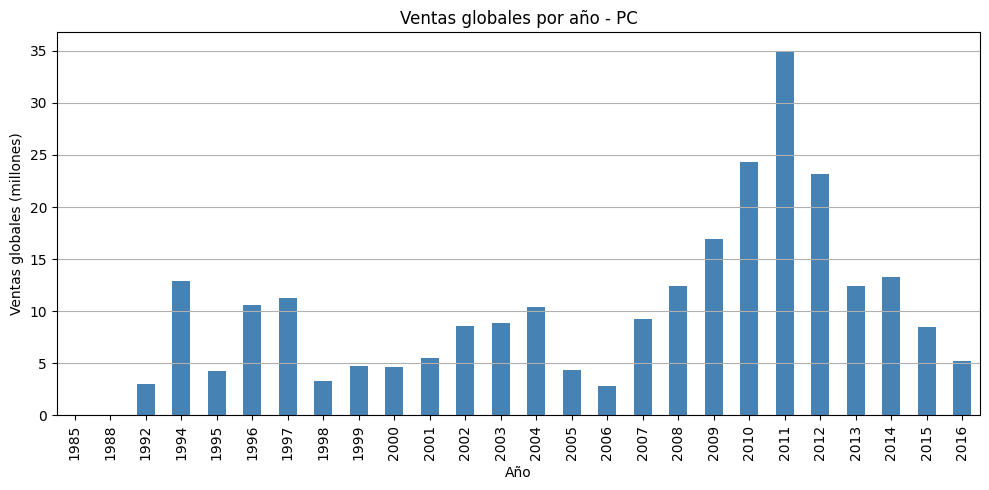

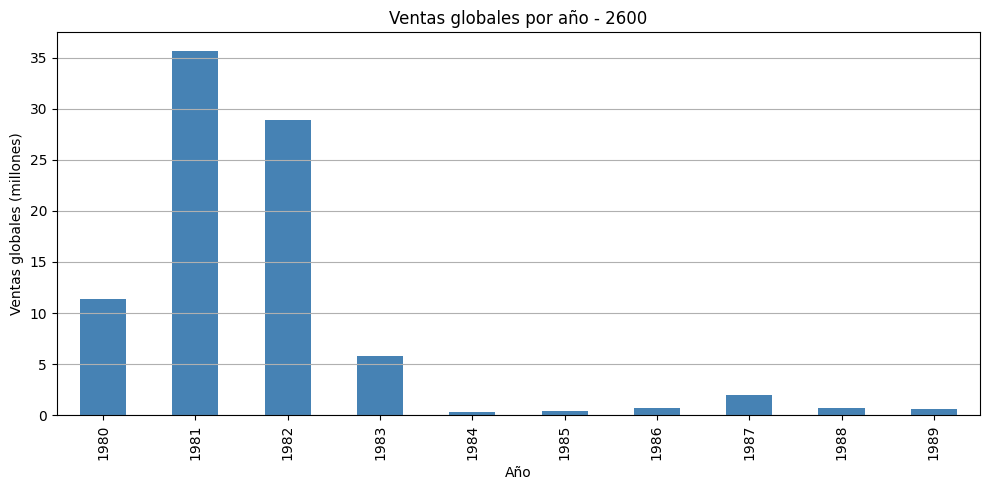

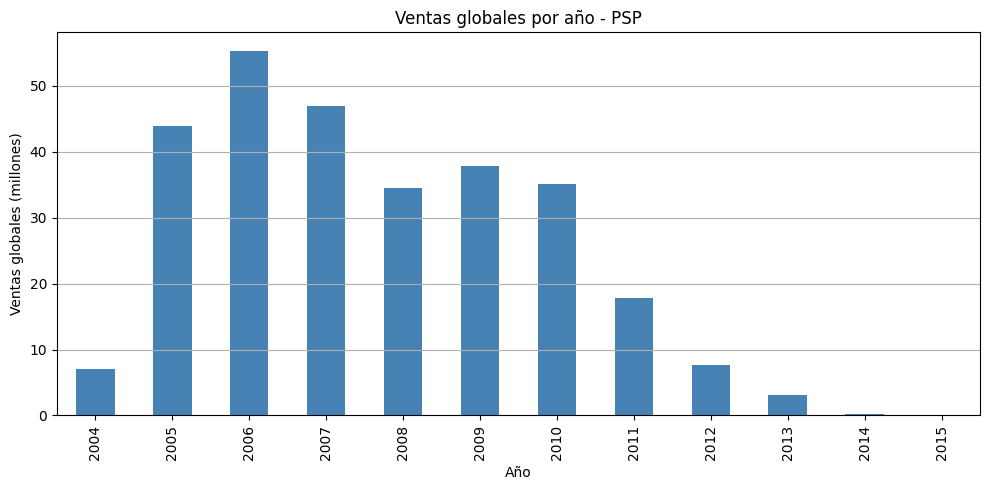

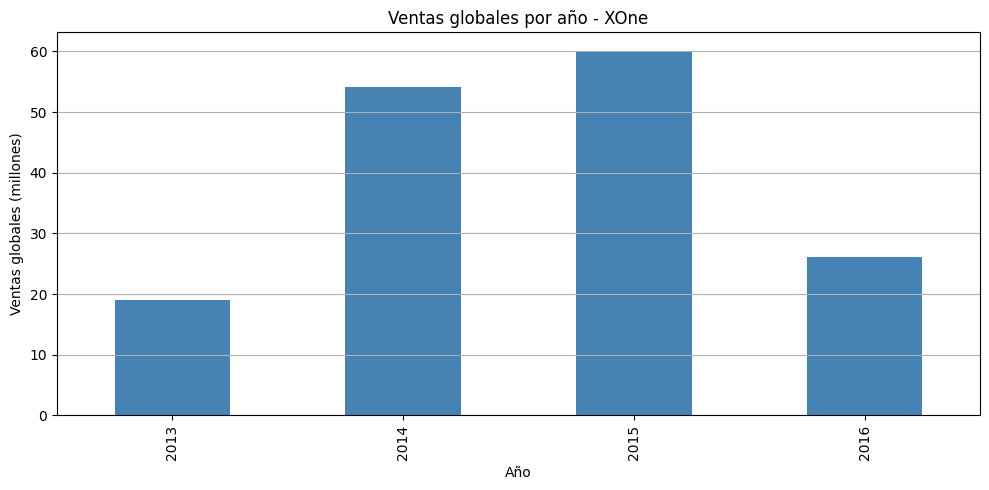

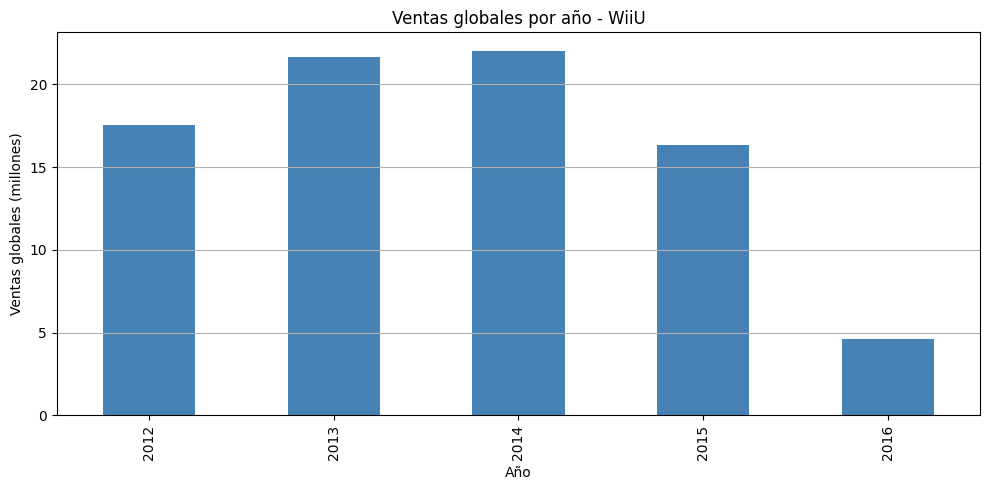

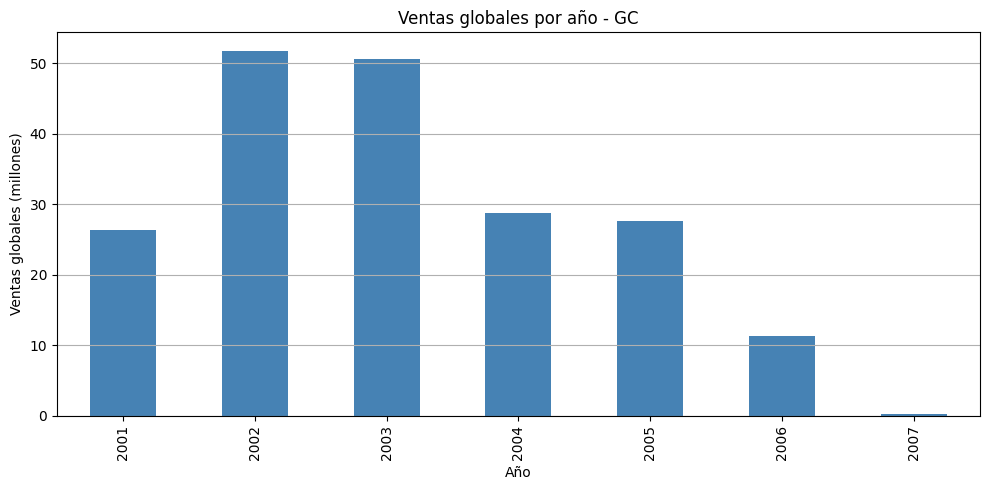

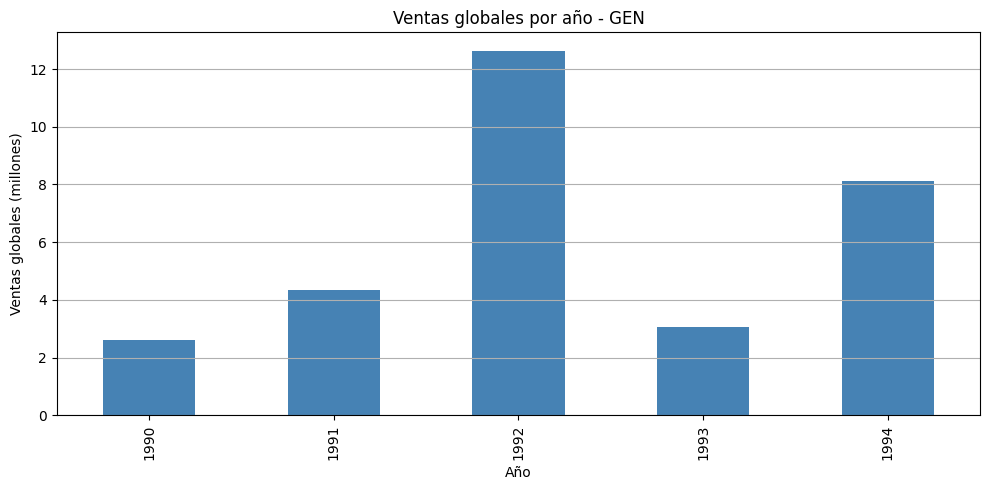

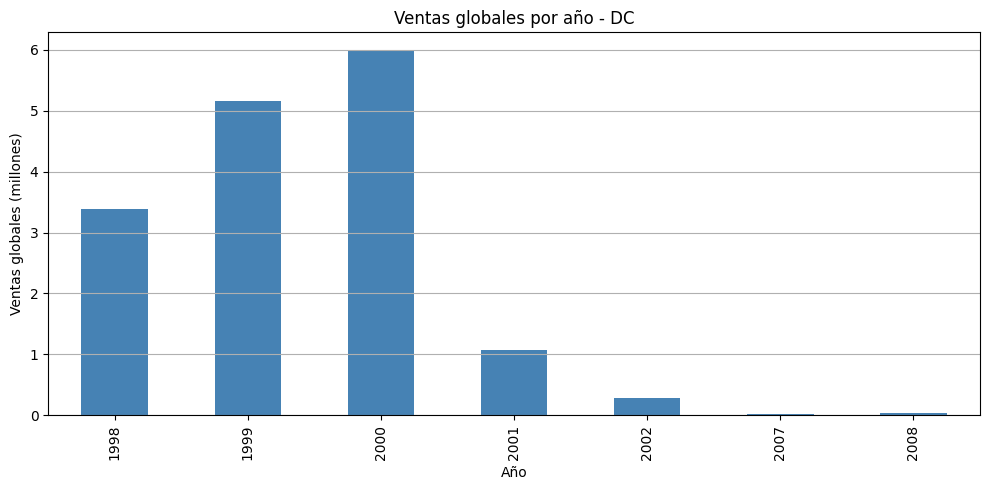

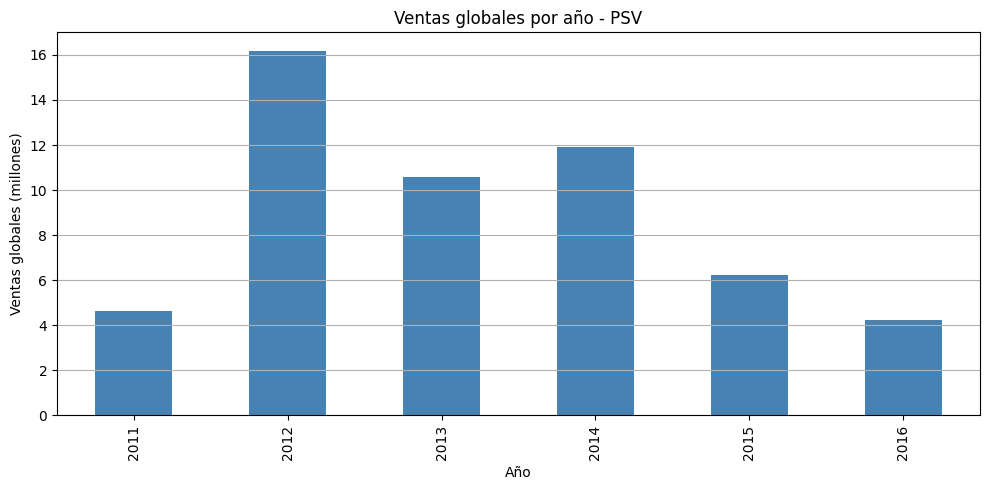

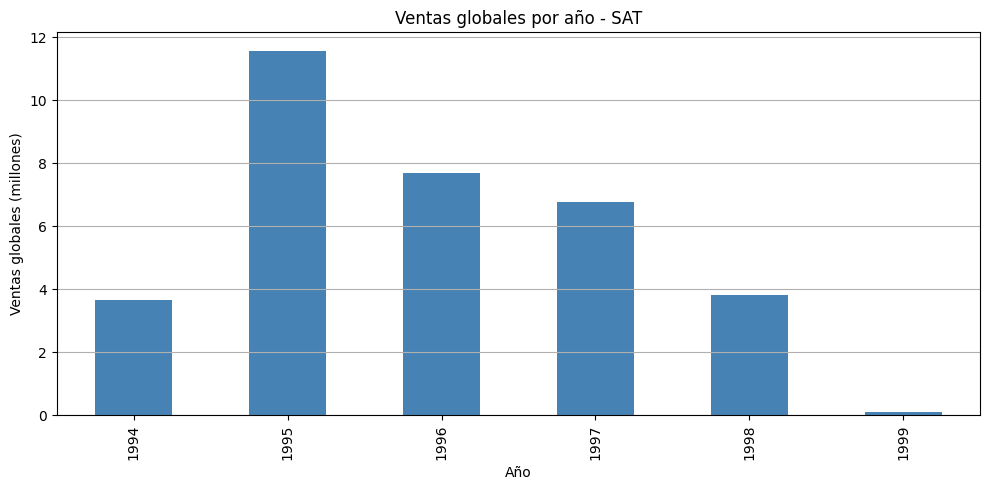

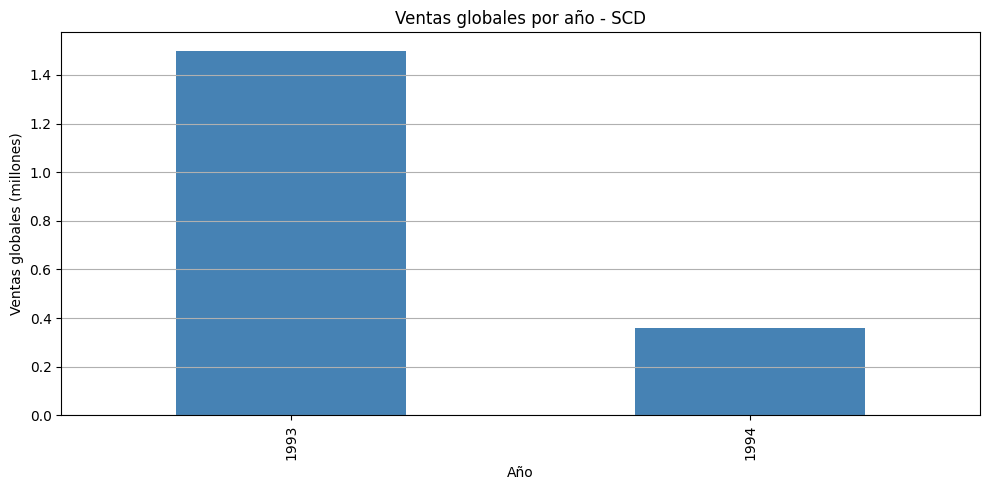

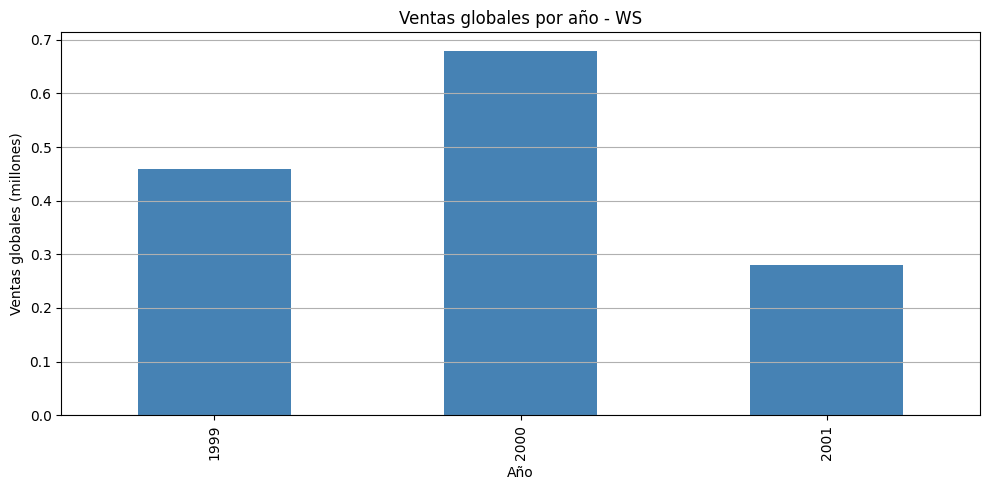

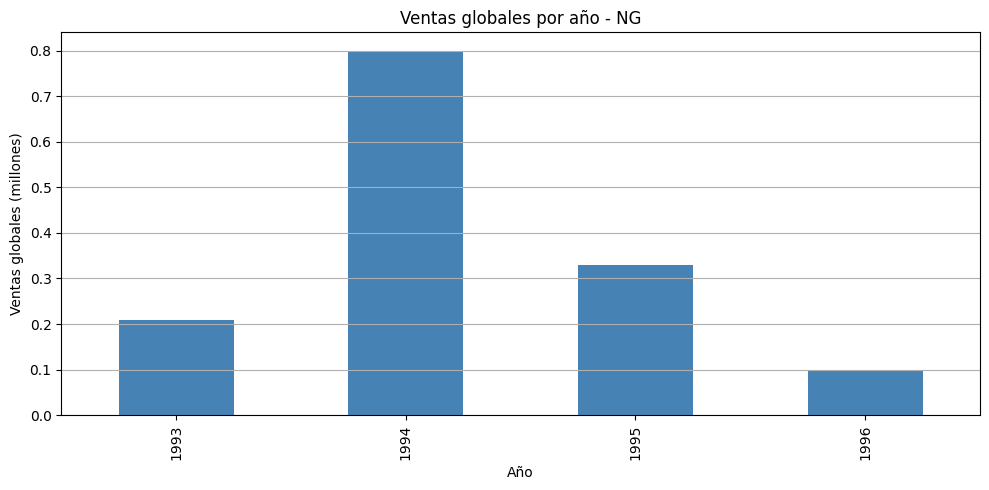

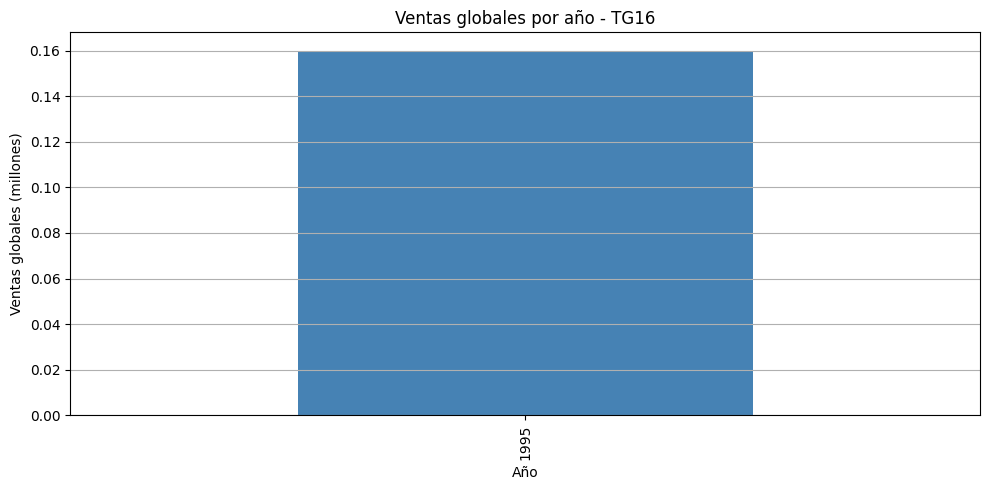

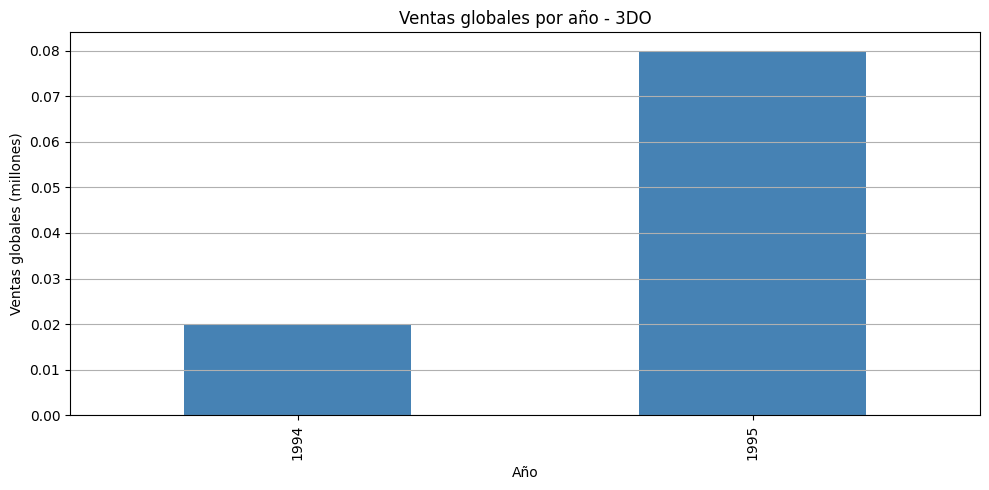

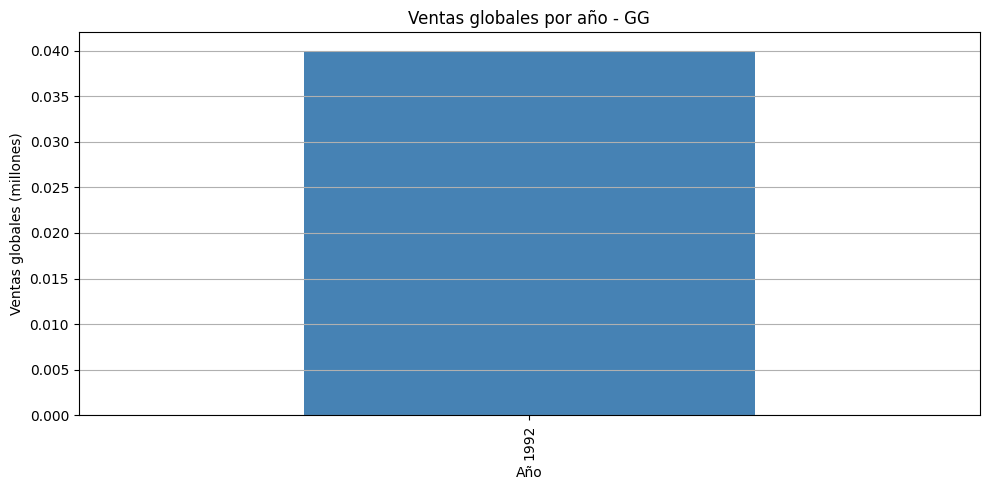

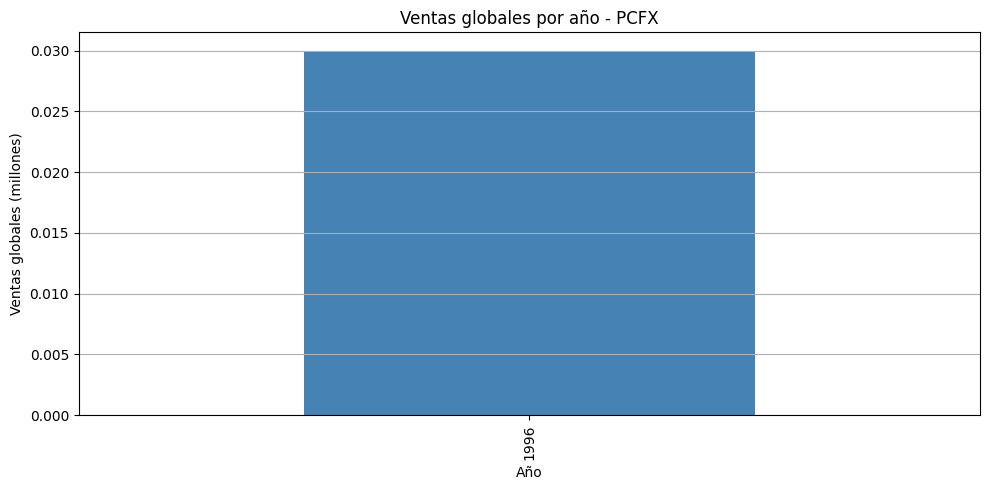

In [18]:
plataformas = df['platform'].unique()

# Crear una gráfica por cada plataforma
for plataforma in plataformas:
    datos_plataforma = df[df['platform'] == plataforma]
    ventas_por_año = datos_plataforma.groupby('year_of_release')['ventas_totales'].sum()
    
    # Saltar si no hay datos suficientes
    if ventas_por_año.empty:
        continue

    plt.figure(figsize=(10, 5))
    ventas_por_año.plot(kind='bar', color='steelblue')
    
    plt.title(f'Ventas globales por año - {plataforma}')
    plt.xlabel('Año')
    plt.ylabel('Ventas globales (millones)')
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

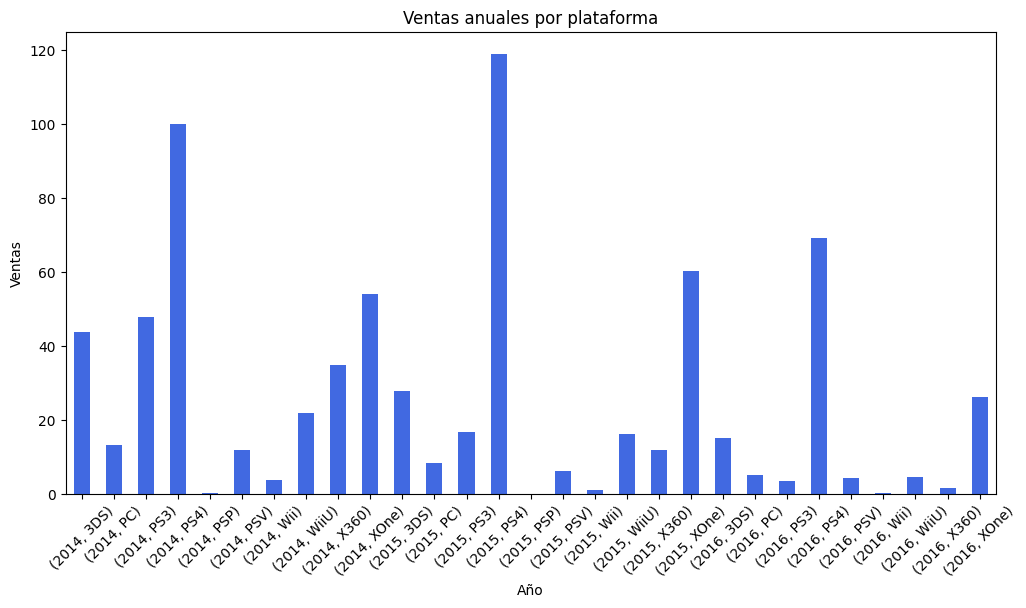

In [19]:
numero_de_juegos_por_año = datos_2014_2016.groupby(['year_of_release', "platform"])["ventas_totales"].sum()
numero_de_juegos_por_año.plot(
    kind='bar',
    figsize=(12, 6),
    color='royalblue',
    xlabel='Año',
    ylabel='Ventas',
    title='Ventas anuales por plataforma',
    rot=45  # para que se vean bien los años
)
plt.show()

Si bien se observo una tendencia al incremento de juegos lanzados por año desde el 1980 , entre el 2009 y 2010 se observo un estancamiento en el numero de juegos, seguido por un descenso en el numero de juegos lanzados en los años posteriores, esto no se debe al numero de consolas, ya que se observo un incremento en el numero de consolas en el mercado, que alcanzo una fase estacionaria en la ultima decada, entre el 2007 al 2016. Se observo tambien una reduccion en las ventas anuales de juegos en todas las consolas, sin embargo la PS4 se mantiene en la sima en ventas, seguida por las Xbox One

In [20]:
print(datos_2014_2016.isna().sum())

name                 0
platform             0
year_of_release      0
genre                0
na_sales             0
eu_sales             0
jp_sales             0
other_sales          0
critic_score       971
user_score         708
rating             749
ventas_totales       0
dtype: int64


In [21]:
datos_2014_2016[datos_2014_2016.isnull().any(axis=1)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,ventas_totales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN,11.68
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,7.98
96,Super Smash Bros. for Wii U and 3DS,3DS,2014,Fighting,3.27,1.37,2.43,0.48,NaN,NaN,NaN,7.55
99,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,NaN,NaN,NaN,7.39
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


In [22]:
print(datos_2014_2016.info())
datos_2014_2016.isna().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1689 entries, 31 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1689 non-null   object 
 1   platform         1689 non-null   object 
 2   year_of_release  1689 non-null   int64  
 3   genre            1689 non-null   object 
 4   na_sales         1689 non-null   float64
 5   eu_sales         1689 non-null   float64
 6   jp_sales         1689 non-null   float64
 7   other_sales      1689 non-null   float64
 8   critic_score     718 non-null    float64
 9   user_score       981 non-null    object 
 10  rating           940 non-null    object 
 11  ventas_totales   1689 non-null   float64
dtypes: float64(6), int64(1), object(5)
memory usage: 171.5+ KB
None


name                 0
platform             0
year_of_release      0
genre                0
na_sales             0
eu_sales             0
jp_sales             0
other_sales          0
critic_score       971
user_score         708
rating             749
ventas_totales       0
dtype: int64

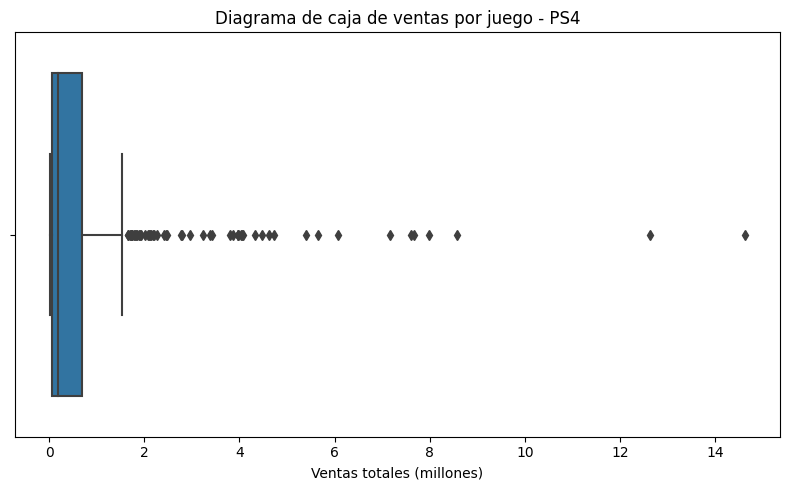

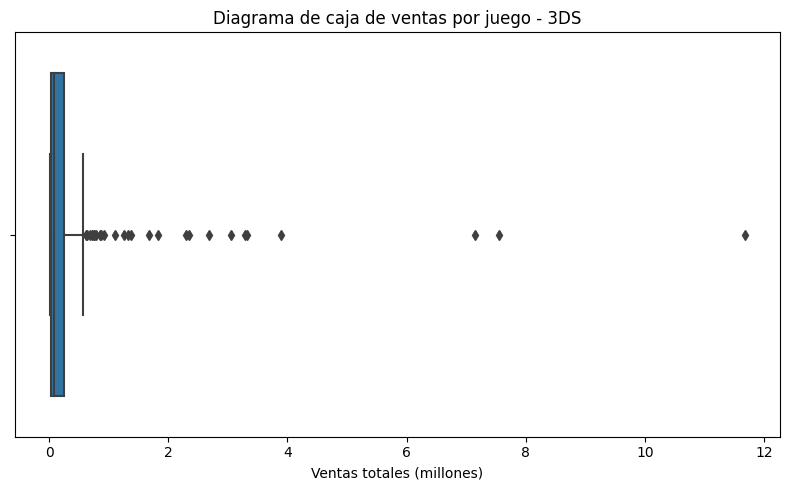

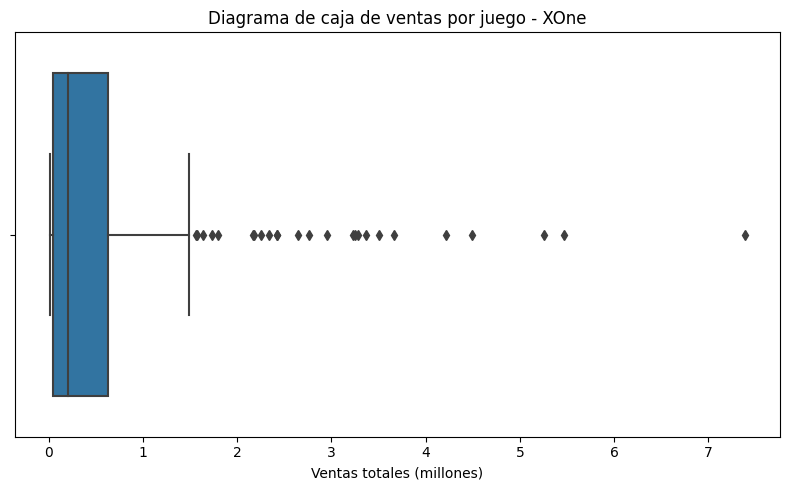

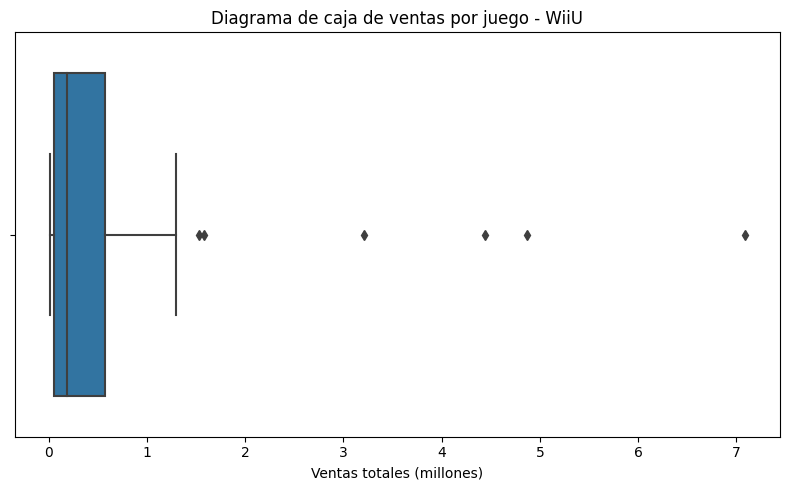

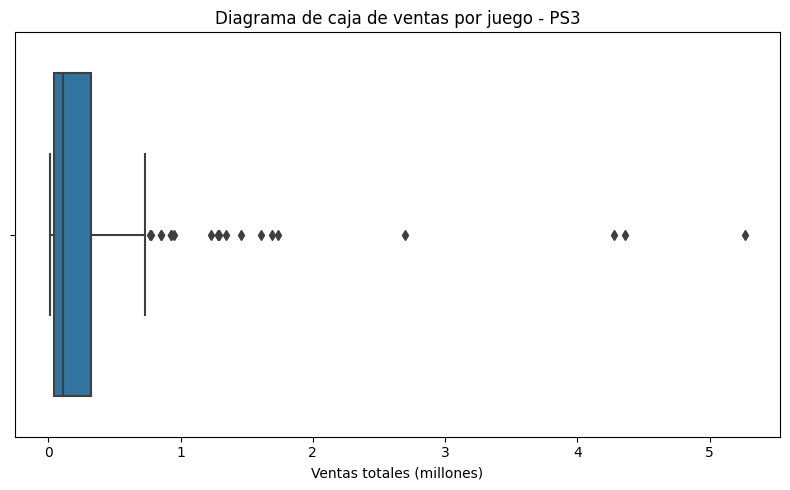

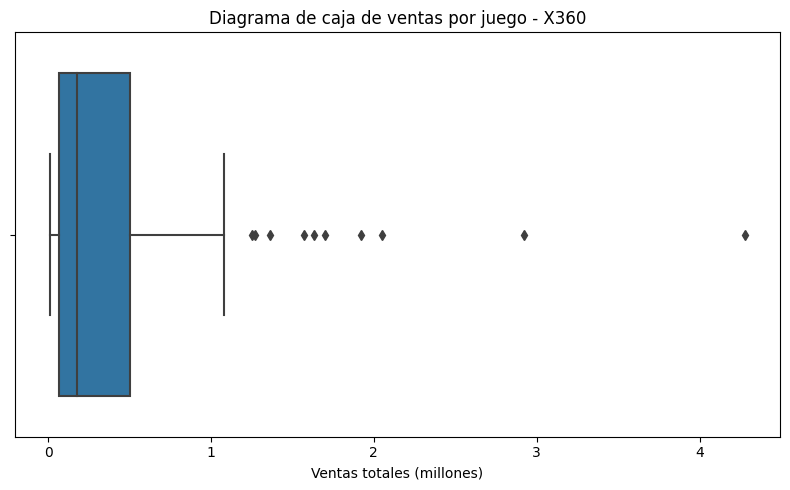

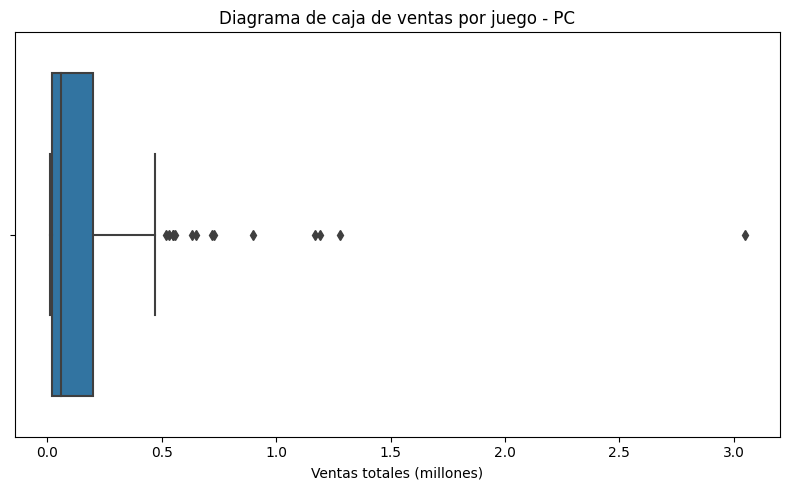

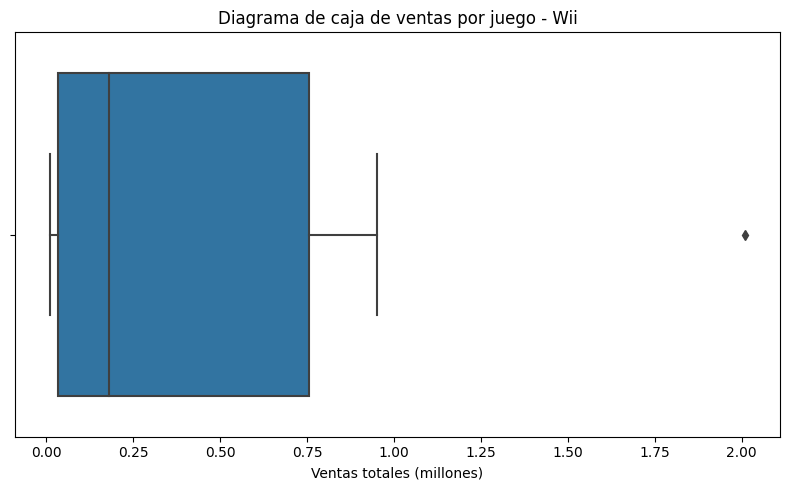

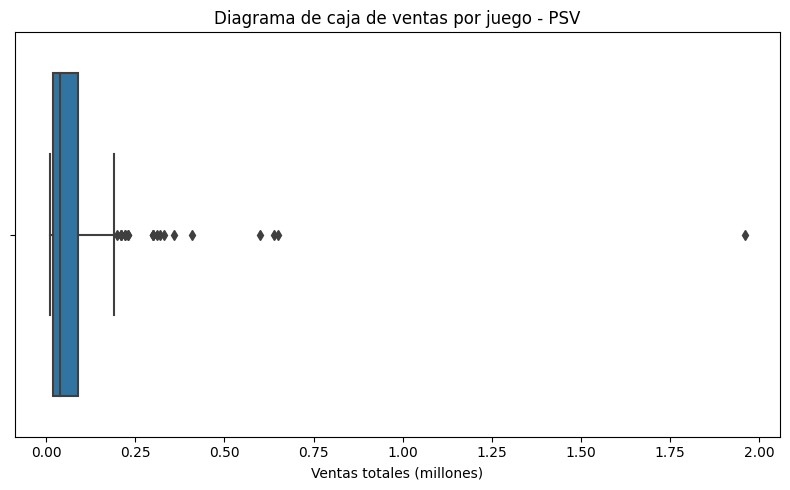

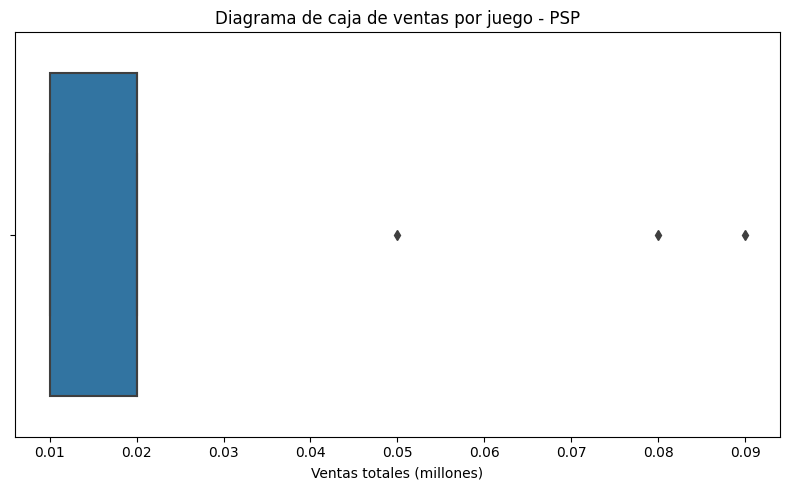

In [23]:
plataformas_2014_2016 = datos_2014_2016['platform'].unique()

# Crear una gráfica por cada plataforma
for plataforma in plataformas_2014_2016:
    datos_plataforma = datos_2014_2016[datos_2014_2016['platform'] == plataforma]
    ventas_de_juego_por_plataforma = datos_plataforma.groupby('name')['ventas_totales'].sum()
    
    # Saltar si no hay datos suficientes
    if ventas_de_juego_por_plataforma.empty:
        continue
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=ventas_de_juego_por_plataforma)
    plt.title(f'Diagrama de caja de ventas por juego - {plataforma}')
    plt.xlabel('Ventas totales (millones)')
    plt.tight_layout()
    plt.show()

In [24]:
datos_2014_2016_depurado_critic_score  = pd.to_numeric(datos_2014_2016['critic_score'], errors='coerce').dropna() 

In [25]:
datos_2014_2016_depurado_user_score  = pd.to_numeric(datos_2014_2016['user_score'], errors='coerce').dropna() 

In [26]:
print(datos_2014_2016_depurado_critic_score.count())
print(datos_2014_2016_depurado_user_score.count())

718
888


In [27]:
corr_critic = datos_2014_2016_depurado_critic_score.corr(datos_2014_2016_depurado_user_score)
print(corr_critic)

0.5044604031800751


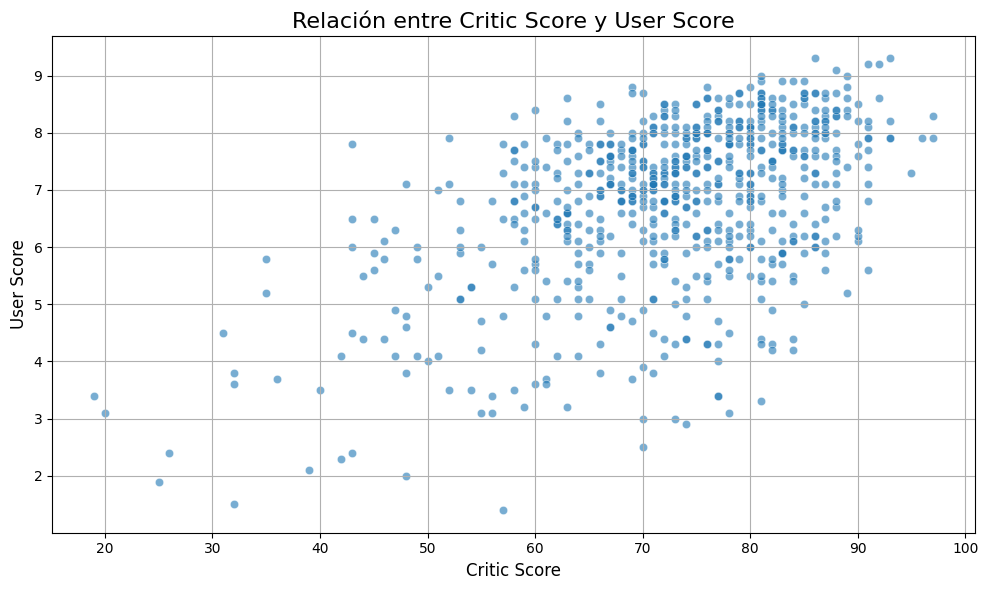

In [28]:
df_scores = pd.DataFrame({
    'critic_score': datos_2014_2016_depurado_critic_score,
    'user_score': datos_2014_2016_depurado_user_score
}).dropna()

# Crear el gráfico
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_scores, x='critic_score', y='user_score', alpha=0.6)

# Títulos y etiquetas
plt.title('Relación entre Critic Score y User Score', fontsize=16)
plt.xlabel('Critic Score', fontsize=12)
plt.ylabel('User Score', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

In [29]:
datos_2014_2016_score_ventas= datos_2014_2016
datos_2014_2016_score_ventas = datos_2014_2016_score_ventas.dropna(subset=['critic_score', "user_score"])
print(datos_2014_2016_score_ventas.isna().sum())

name                0
platform            0
year_of_release     0
genre               0
na_sales            0
eu_sales            0
jp_sales            0
other_sales         0
critic_score        0
user_score          0
rating             29
ventas_totales      0
dtype: int64


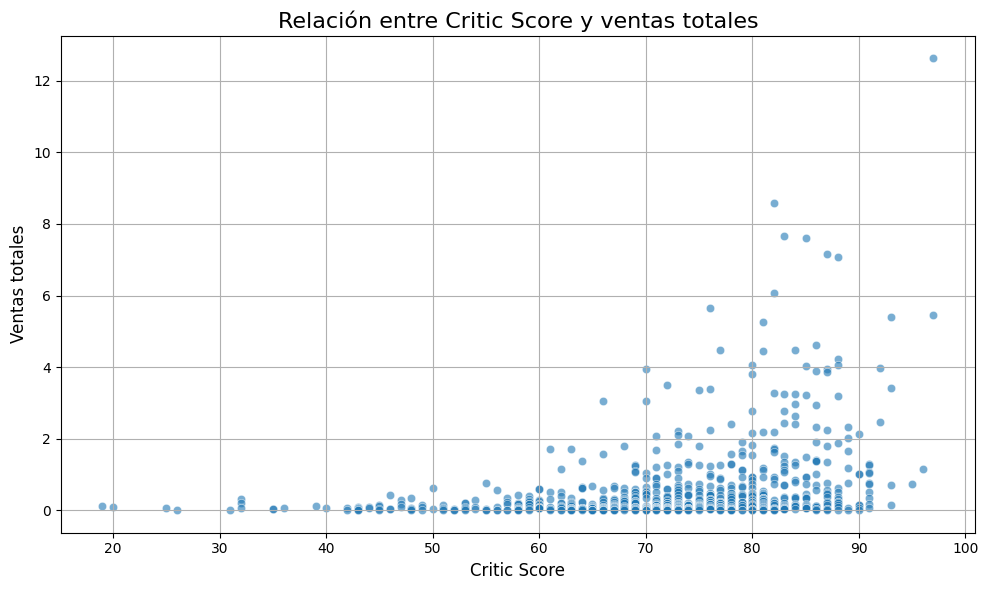

La correlacion de Pearson es 0.32748578117958693


In [30]:
analisis = ["critic_score", "ventas_totales"]
critic= datos_2014_2016_score_ventas[analisis]
plt.figure(figsize=(10, 6))
sns.scatterplot(data=critic, x="critic_score", y='ventas_totales', alpha=0.6)

# Títulos y etiquetas
plt.title('Relación entre Critic Score y ventas totales', fontsize=16)
plt.xlabel('Critic Score', fontsize=12)
plt.ylabel('Ventas totales', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()
print("La correlacion de Pearson es", critic["critic_score"].corr(critic["ventas_totales"]))

In [31]:
datos_2014_2016_score_ventas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 715 entries, 42 to 16692
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             715 non-null    object 
 1   platform         715 non-null    object 
 2   year_of_release  715 non-null    int64  
 3   genre            715 non-null    object 
 4   na_sales         715 non-null    float64
 5   eu_sales         715 non-null    float64
 6   jp_sales         715 non-null    float64
 7   other_sales      715 non-null    float64
 8   critic_score     715 non-null    float64
 9   user_score       715 non-null    object 
 10  rating           686 non-null    object 
 11  ventas_totales   715 non-null    float64
dtypes: float64(6), int64(1), object(5)
memory usage: 72.6+ KB


In [32]:
datos_2014_2016_score_ventas['user_score'] = pd.to_numeric(
    datos_2014_2016_score_ventas['user_score'].replace('tbd', np.nan), errors='coerce'
)

# Elimina las filas con valores faltantes en user_score o ventas_totales
df_user = datos_2014_2016_score_ventas.dropna(subset=['user_score'])

/tmp/ipykernel_32/2223188068.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_2014_2016_score_ventas['user_score'] = pd.to_numeric(


In [33]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 704 entries, 42 to 16692
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             704 non-null    object 
 1   platform         704 non-null    object 
 2   year_of_release  704 non-null    int64  
 3   genre            704 non-null    object 
 4   na_sales         704 non-null    float64
 5   eu_sales         704 non-null    float64
 6   jp_sales         704 non-null    float64
 7   other_sales      704 non-null    float64
 8   critic_score     704 non-null    float64
 9   user_score       704 non-null    float64
 10  rating           676 non-null    object 
 11  ventas_totales   704 non-null    float64
dtypes: float64(7), int64(1), object(4)
memory usage: 71.5+ KB


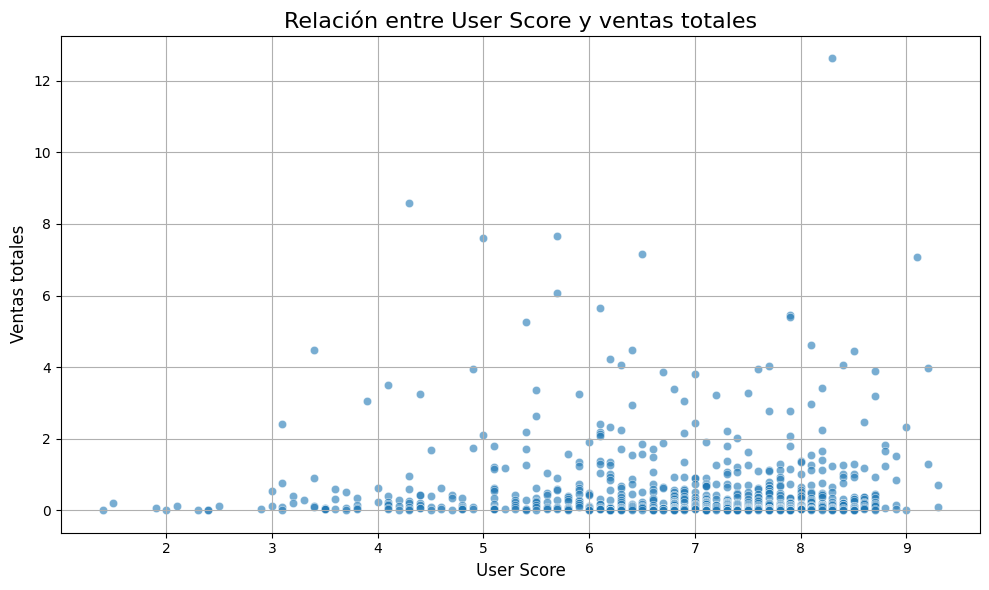

La correlacion de Pearson es 0.005202258360087502


In [34]:
analisis_user= ["user_score", "ventas_totales"]
user= df_user[analisis_user]
plt.figure(figsize=(10, 6))
sns.scatterplot(data=user, x="user_score", y='ventas_totales', alpha=0.6)

# Títulos y etiquetas
plt.title('Relación entre User Score y ventas totales', fontsize=16)
plt.xlabel('User Score', fontsize=12)
plt.ylabel('Ventas totales', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()
print("La correlacion de Pearson es", user["user_score"].corr(user["ventas_totales"]))

Se observo una correlacion media entre el critic score y el user score, sin embargo, la correlacion entre los score y las ventas fue baja, la critic score tuvo una mayor correlacion con las ventas (0.32) que la user score (0.005), sin embargo, al ser tan baja la correlacion no me parece muy fiable para hacer proyecciones futuras

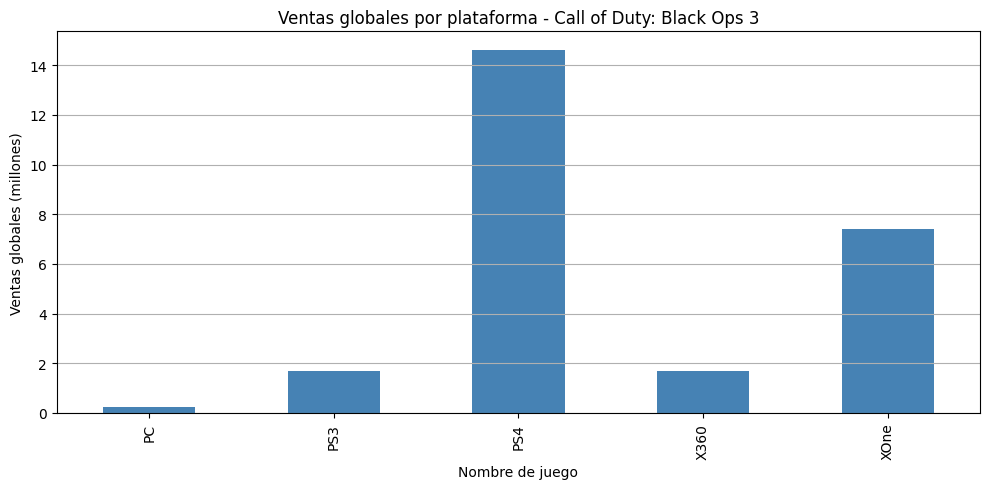

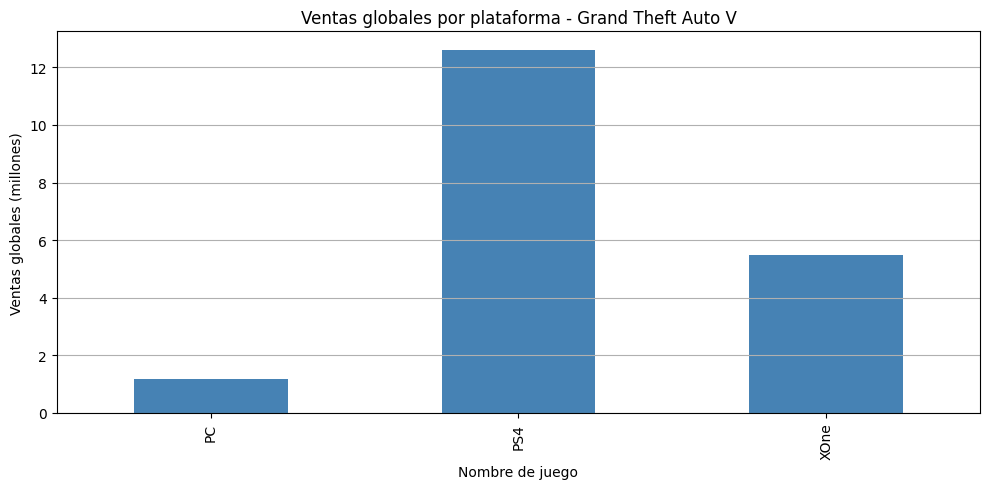

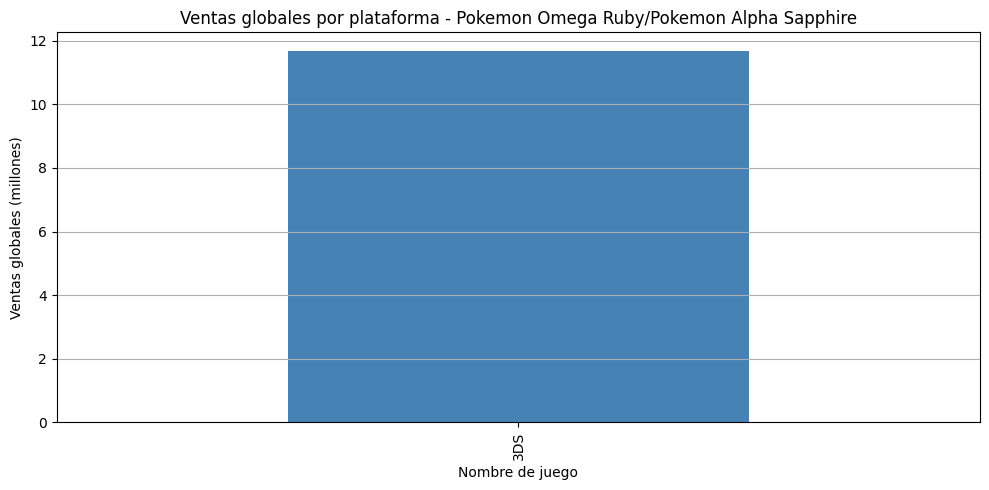

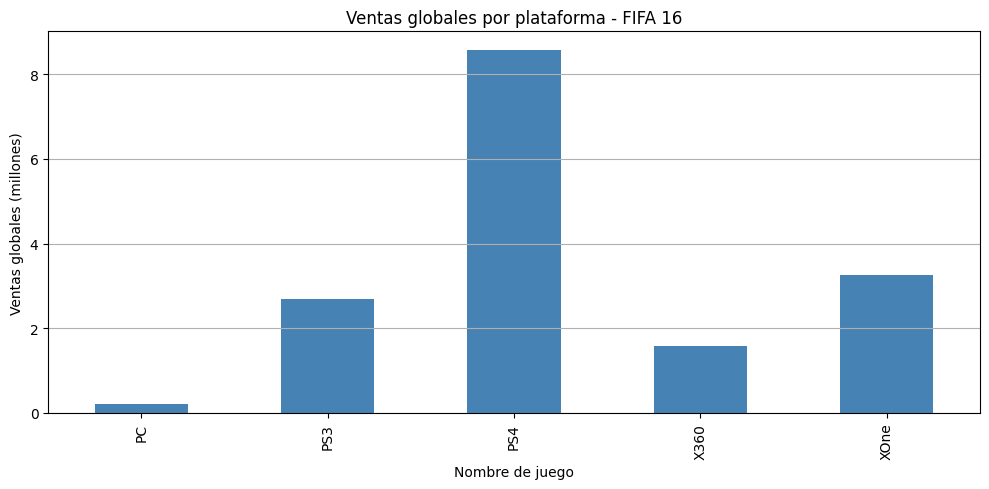

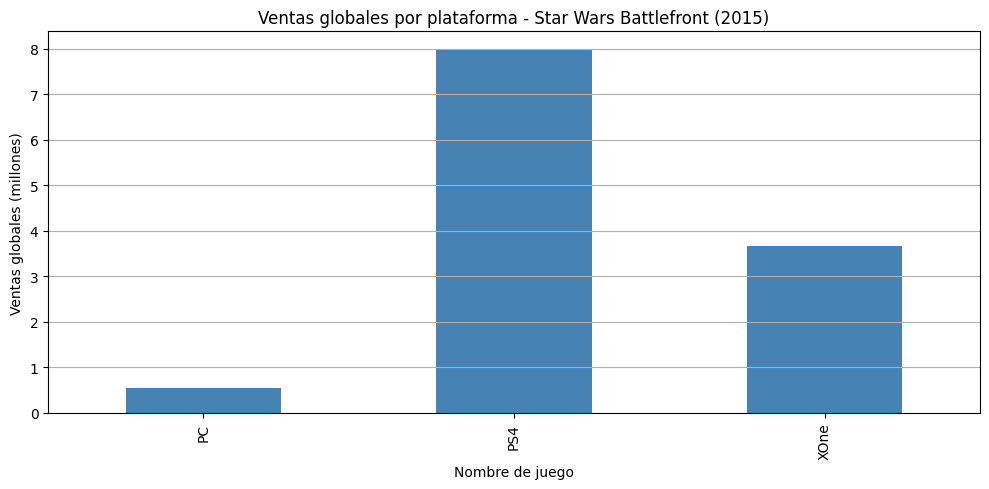

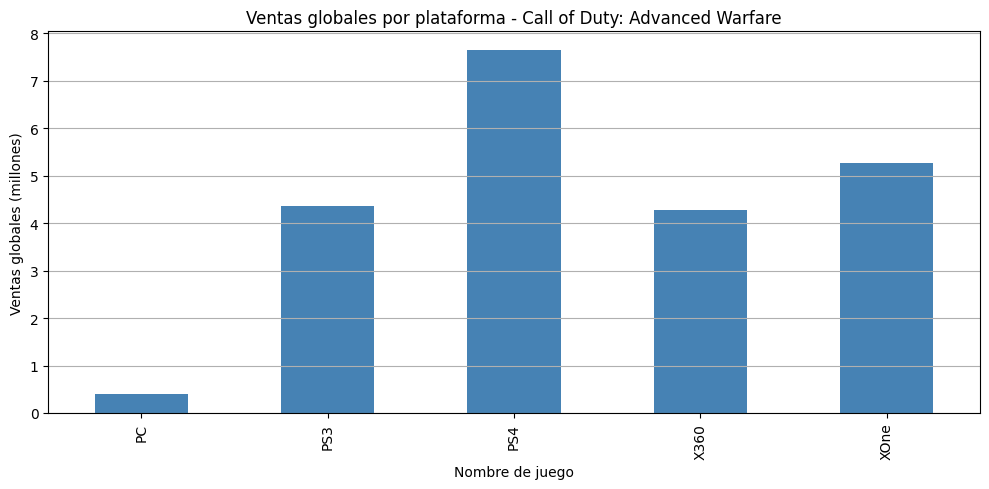

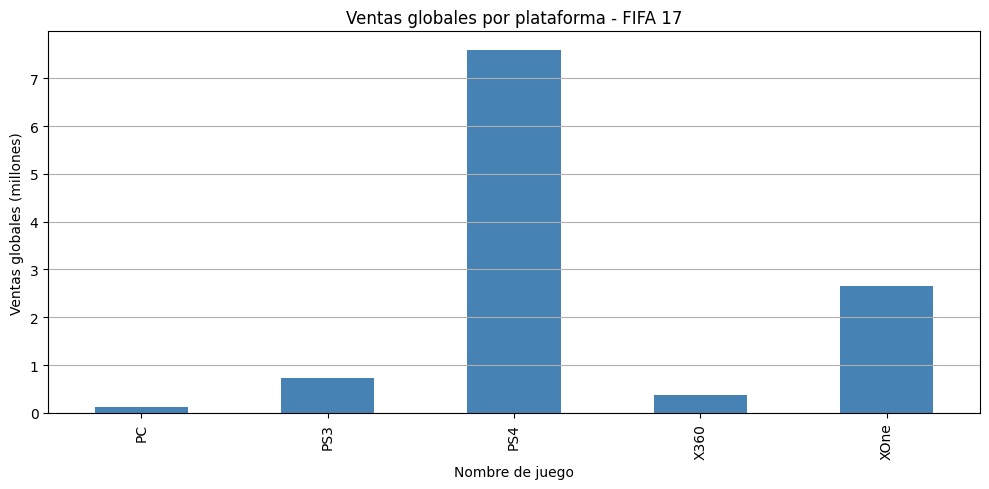

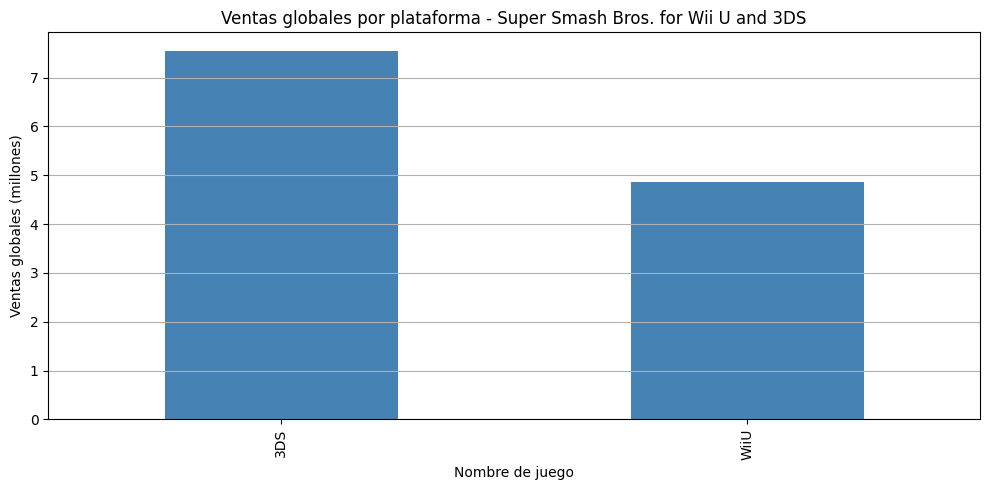

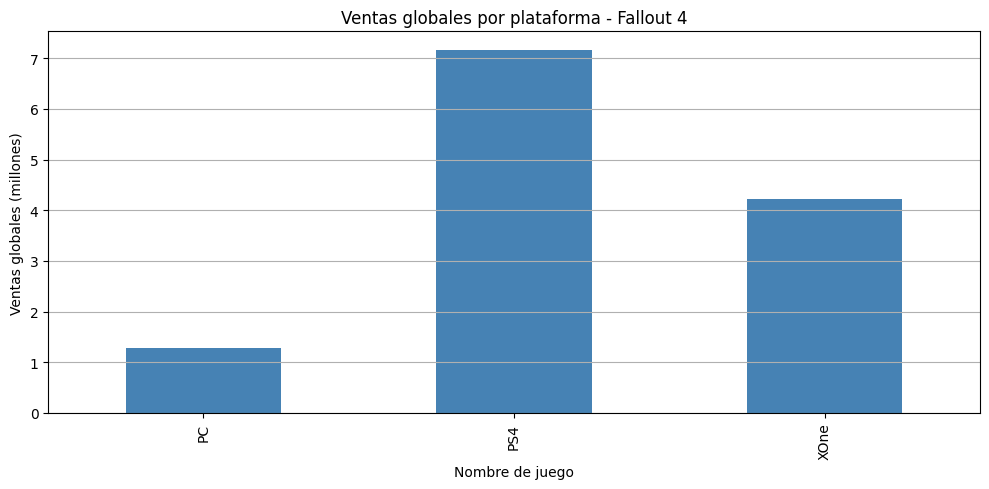

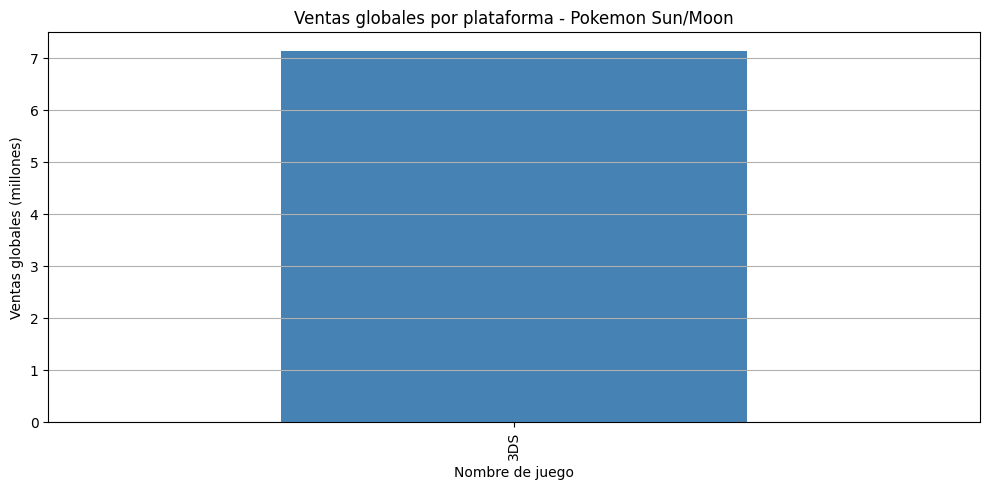

In [35]:
juegos = datos_2014_2016['name'].unique()

# Crear una gráfica por cada plataforma
for juego in juegos[:10]:
    datos_juego = datos_2014_2016[datos_2014_2016['name'] == juego]
    ventas_por_plataforma = datos_juego.groupby('platform')['ventas_totales'].sum()
    
    # Saltar si no hay datos suficientes
    if ventas_por_plataforma.empty:
        continue

    plt.figure(figsize=(10, 5))
    ventas_por_plataforma.plot(kind='bar', color='steelblue')
    
    plt.title(f'Ventas globales por plataforma - {juego}')
    plt.xlabel('Nombre de juego')
    plt.ylabel('Ventas globales (millones)')
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()



In [36]:
print(datos_2014_2016["genre"].unique())

['Shooter' 'Action' 'Role-Playing' 'Sports' 'Fighting' 'Racing' 'Misc'
 'Platform' 'Simulation' 'Adventure' 'Puzzle' 'Strategy']


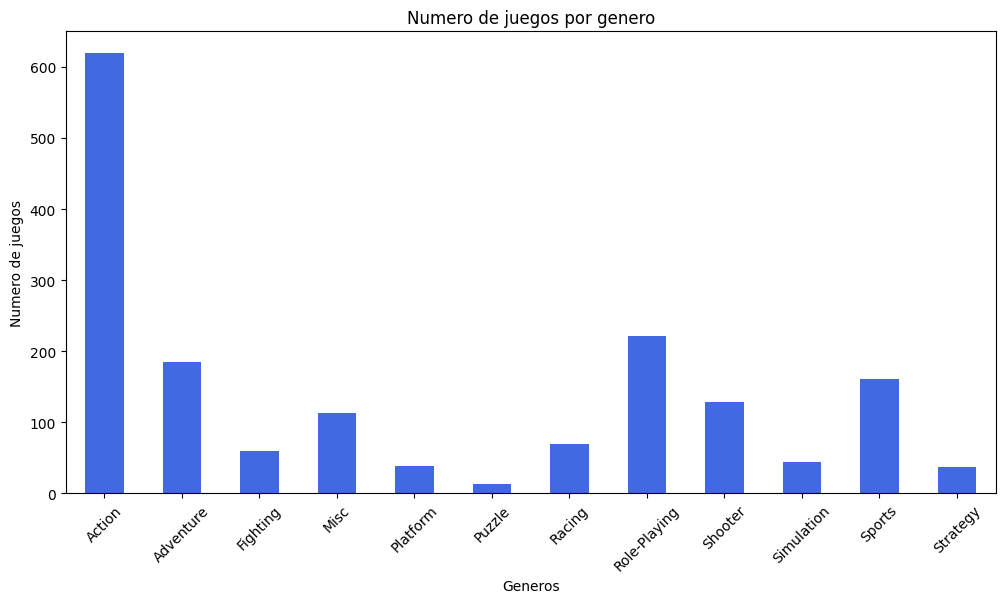

In [37]:
generos_mas_comunes = datos_2014_2016.groupby('genre')['name'].count()
generos_mas_comunes.plot(
    kind='bar',
    figsize=(12, 6),
    color='royalblue',
    xlabel='Generos',
    ylabel='Numero de juegos',
    title='Numero de juegos por genero',
    rot=45  # para que se vean bien los años
)
plt.show()

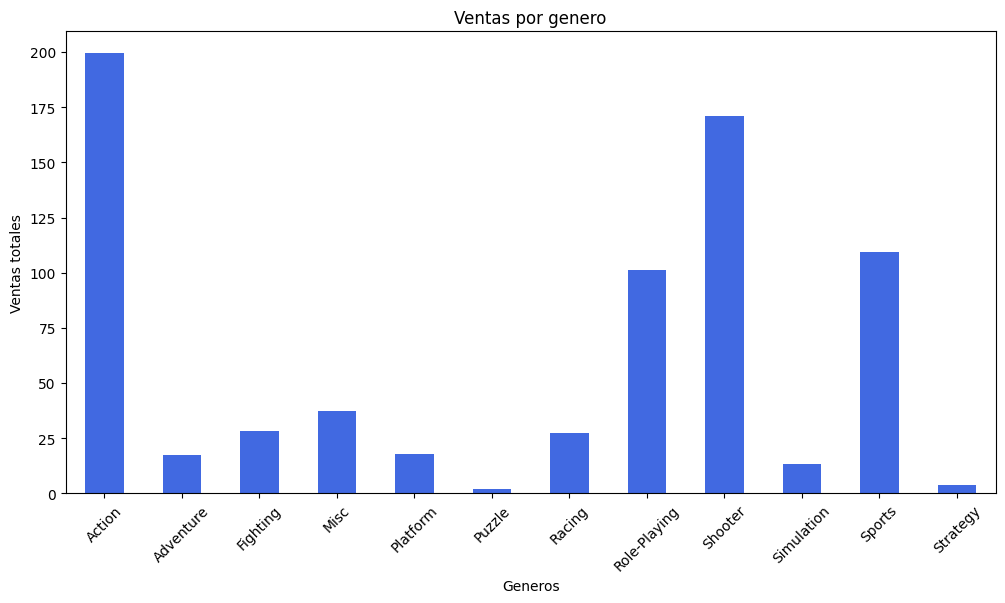

In [38]:
generos_ventas = datos_2014_2016.groupby('genre')['ventas_totales'].sum()
generos_ventas.plot(
    kind='bar',
    figsize=(12, 6),
    color='royalblue',
    xlabel='Generos',
    ylabel='Ventas totales',
    title='Ventas por genero',
    rot=45  # para que se vean bien los años
)
plt.show()

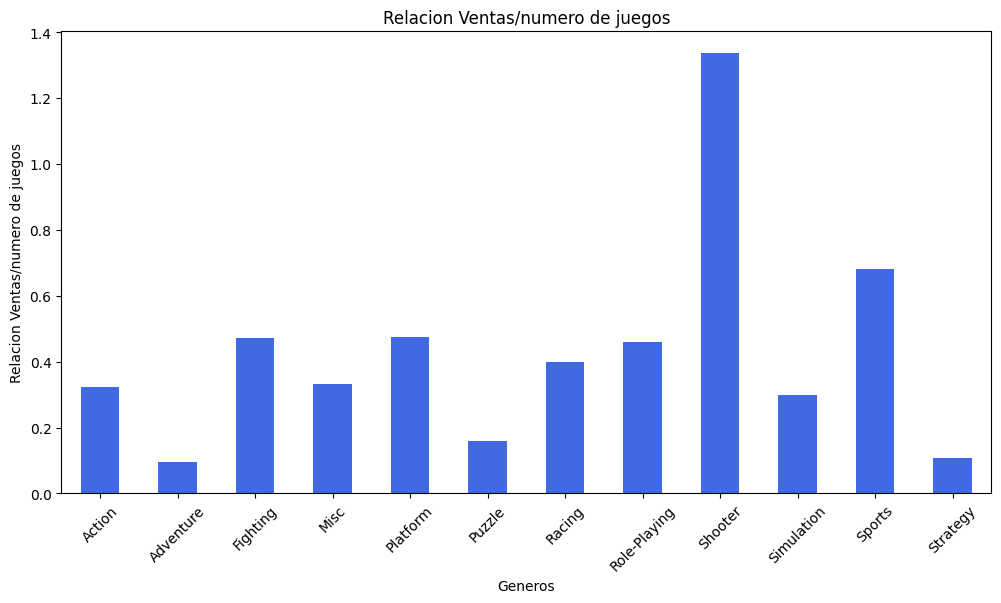

In [39]:
relacion_ventas_juegos = generos_ventas/generos_mas_comunes
relacion_ventas_juegos.plot(
    kind='bar',
    figsize=(12, 6),
    color='royalblue',
    xlabel='Generos',
    ylabel='Relacion Ventas/numero de juegos',
    title='Relacion Ventas/numero de juegos',
    rot=45  # para que se vean bien los años
)
plt.show()

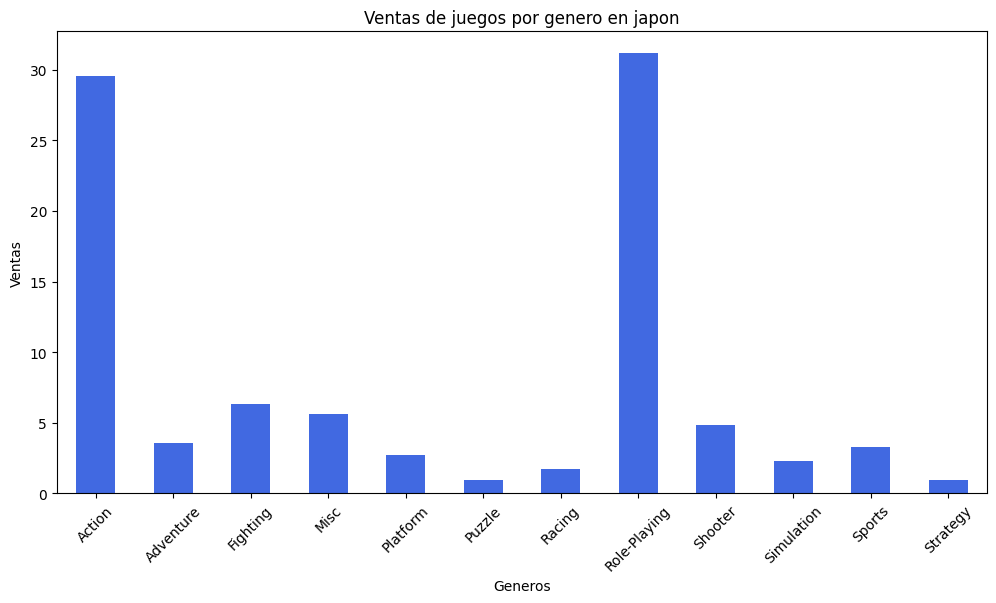

In [40]:
ventas_juegos_jp = datos_2014_2016.groupby('genre')['jp_sales'].sum()
ventas_juegos_jp.plot(
    kind='bar',
    figsize=(12, 6),
    color='royalblue',
    xlabel='Generos',
    ylabel='Ventas',
    title='Ventas de juegos por genero en japon',
    rot=45  # para que se vean bien los años
)
plt.show()

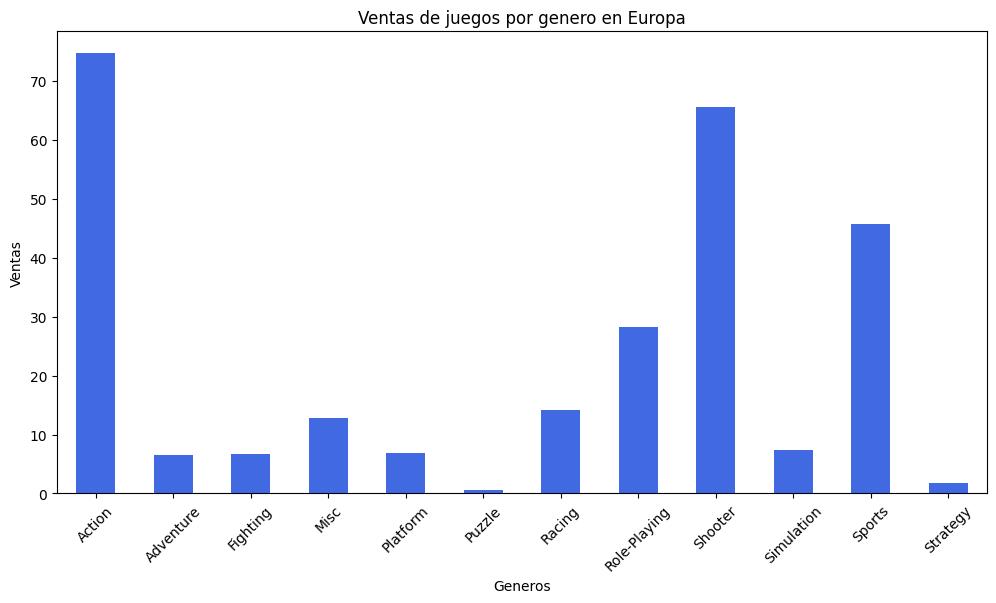

In [41]:
ventas_juegos_eu = datos_2014_2016.groupby('genre')['eu_sales'].sum()
ventas_juegos_eu.plot(
    kind='bar',
    figsize=(12, 6),
    color='royalblue',
    xlabel='Generos',
    ylabel='Ventas',
    title='Ventas de juegos por genero en Europa',
    rot=45  # para que se vean bien los años
)
plt.show()

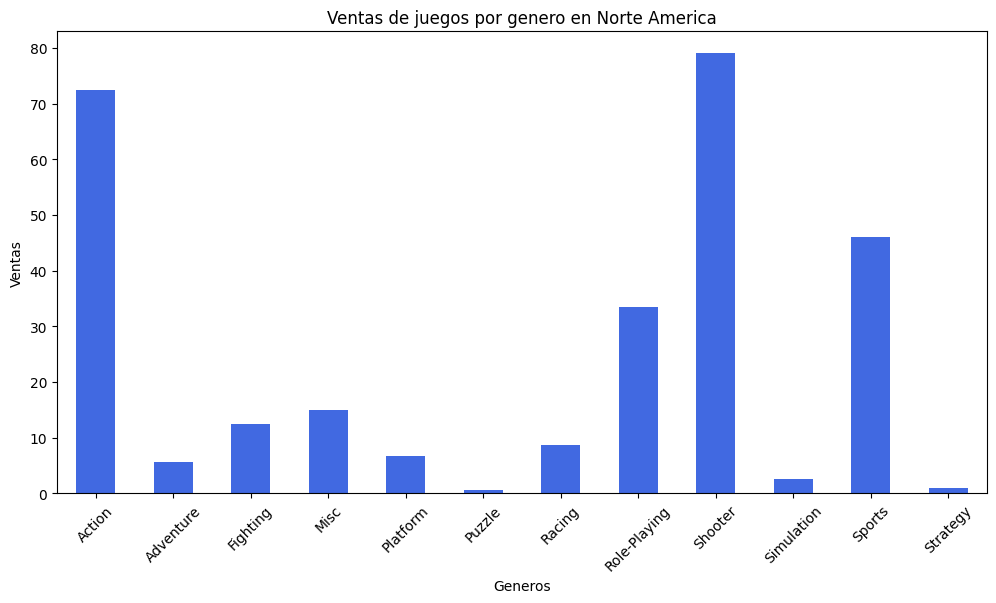

In [42]:
ventas_juegos_na = datos_2014_2016.groupby('genre')['na_sales'].sum()
ventas_juegos_na.plot(
    kind='bar',
    figsize=(12, 6),
    color='royalblue',
    xlabel='Generos',
    ylabel='Ventas',
    title='Ventas de juegos por genero en Norte America',
    rot=45  # para que se vean bien los años
)
plt.show()

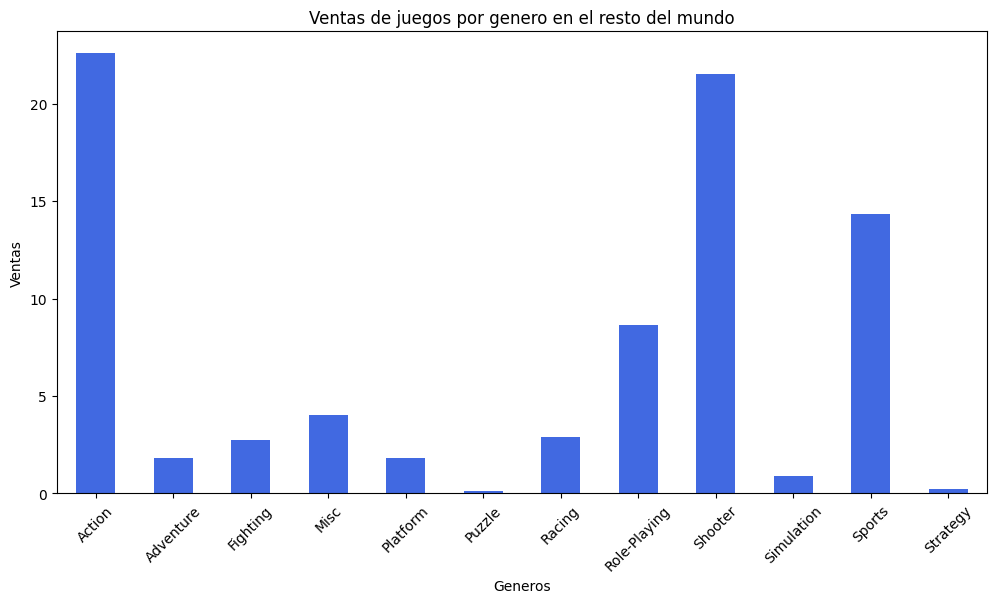

In [43]:
ventas_juegos_ot = datos_2014_2016.groupby('genre')['other_sales'].sum()
ventas_juegos_ot.plot(
    kind='bar',
    figsize=(12, 6),
    color='royalblue',
    xlabel='Generos',
    ylabel='Ventas',
    title='Ventas de juegos por genero en el resto del mundo',
    rot=45  # para que se vean bien los años
)
plt.show()

Se observo un mayor lanzamiento de juegos de accion en el periodo estuduiado, conformado los años 2014 al 2016, seguido de los juegos de roles, juegos e aventuras, juegos de deportes y shooters en ese orden. Sin embargo, el numero de juegos no refleja la cantidad de ventas que obtuvo cada genero. Si bien el genero de accion fue el genero con mayor ventas, seguido del shooter, deportes y los juegos de rol, la diferencia entre las ventas obtenidas entre el genero de accion y de shooter es baja, presentando de hecho el genero shooter una mayor relacion ventas/juegos lanzandos, seguido por los juegos de deportes. Por otro lado, en japon se observa que los generos mas populares son los juegos de roles y de accion, mientras que en Europa dominan los juegos de accion, seguido de los shooter y los juegos de deportes, en Estaos unidos dominan los shooter, seguidos de los juegos de accion, los juegos de deportes y los juegos de roles. Mientras en el resto del mundo se observo una preferencia por los juegos de accion, seguidos por los shooter, los juegos de deportes y los juegos de roles

In [54]:
alpha = 0.05  # el nivel de significancia estadística crítica
Xbox_one= datos_2014_2016[datos_2014_2016["platform"] == 'XOne']["ventas_totales"]
Play_station = datos_2014_2016[datos_2014_2016["platform"] == 'PC']["ventas_totales"]
results = st.ttest_ind(Xbox_one, Play_station)

print('valor p: ', results.pvalue)

if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")


valor p:  1.0531470246347807e-06
Rechazamos la hipótesis nula


In [55]:
datos_2016= datos_2014_2016[datos_2014_2016["year_of_release"] == 2016]

alpha = 0.05  # el nivel de significancia estadística crítica
Xbox_one= datos_2016[datos_2016["platform"] == 'XOne']["ventas_totales"]
Play_station = datos_2016[datos_2016["platform"] == 'PC']["ventas_totales"]
results = st.ttest_ind(Xbox_one, Play_station)

print('valor p: ', results.pvalue)

if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

valor p:  0.008545722489705232
Rechazamos la hipótesis nula


In [57]:
deportes= datos_2014_2016[datos_2014_2016["genre"] == "Sports"]["ventas_totales"]
accion= datos_2014_2016[datos_2014_2016["genre"] == "Action"]["ventas_totales"]
results_d_a= st.ttest_ind(deportes, accion)
print('valor p: ', results_d_a.pvalue)

if results_d_a.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

valor p:  9.315515635829361e-06
Rechazamos la hipótesis nula


In [58]:
disparos= datos_2014_2016[datos_2014_2016["genre"] == "Shooter"]["ventas_totales"]
results_dis_a= st.ttest_ind(disparos, accion)
print('valor p: ', results_dis_a.pvalue)

if results_dis_a.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

valor p:  9.782803164328045e-20
Rechazamos la hipótesis nula


Conclusiones
Se eligieron los años del 2014 al 2016 ya que son los años mas recientes y se observó un cambio en la tendencia que seguian los juegos en los años mas recientes, llendo a la baja en el numero de juegos lanzados y ventas obtenidas. Se observo que el genero de accion es el genero que genera mayores ventas, sin embargo, tambien es el genero que mas juegos lanza por año. Los shooter son los juegos con la mayor relacion ventas/juegos lanzados, por lo que es mas conveniente lanzar un juego shooter, no tienen tanta compencia y producen grandes ventas

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Buen trabajo con el proyecto realizado, tienes un notebook con buena presentación y los análisis están correctamente redactados en cada parte del proyecto. Te felicito por la excelente presentación que le has dado a tu notebook, es importante que nuestros proyectos queden claros y legibles porque a menudo se deben compartir entre compañeros de equipo.
    
Te recomendaría redactar lo que se interpreta de cada gráfica mostrada, pero las conclusiones finales son super detalladas y resaltan los puntos más importantes del notebook.
    
    Saludos!
</div>